In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /Users/suvedharam/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


Import Python Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
filename = path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filename)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
null_values = data.isnull().sum()

for column in data.columns:
    print(f"Column {column} has {null_values[column]} null values")


Column customerID has 0 null values
Column gender has 0 null values
Column SeniorCitizen has 0 null values
Column Partner has 0 null values
Column Dependents has 0 null values
Column tenure has 0 null values
Column PhoneService has 0 null values
Column MultipleLines has 0 null values
Column InternetService has 0 null values
Column OnlineSecurity has 0 null values
Column OnlineBackup has 0 null values
Column DeviceProtection has 0 null values
Column TechSupport has 0 null values
Column StreamingTV has 0 null values
Column StreamingMovies has 0 null values
Column Contract has 0 null values
Column PaperlessBilling has 0 null values
Column PaymentMethod has 0 null values
Column MonthlyCharges has 0 null values
Column TotalCharges has 0 null values
Column Churn has 0 null values


In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
object_columns = data.select_dtypes(include='object').columns
for column in object_columns:
    print(f"Distinct values in column {column}: {data[column].unique()}")

Distinct values in column customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Distinct values in column gender: ['Female' 'Male']
Distinct values in column Partner: ['Yes' 'No']
Distinct values in column Dependents: ['No' 'Yes']
Distinct values in column PhoneService: ['No' 'Yes']
Distinct values in column MultipleLines: ['No phone service' 'No' 'Yes']
Distinct values in column InternetService: ['DSL' 'Fiber optic' 'No']
Distinct values in column OnlineSecurity: ['No' 'Yes' 'No internet service']
Distinct values in column OnlineBackup: ['Yes' 'No' 'No internet service']
Distinct values in column DeviceProtection: ['No' 'Yes' 'No internet service']
Distinct values in column TechSupport: ['No' 'Yes' 'No internet service']
Distinct values in column StreamingTV: ['No' 'Yes' 'No internet service']
Distinct values in column StreamingMovies: ['No' 'Yes' 'No internet service']
Distinct values in column Contract: ['Month-to-month' 'One year' 'Two yea

In [25]:
new_data = data.drop(columns=['customerID'])
new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'], errors='coerce')
new_data['SeniorCitizen'] = new_data['SeniorCitizen'].astype('object')
print(new_data.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [26]:
print(new_data.describe())
object_columns = new_data.select_dtypes(include='object').columns.drop('Churn')
for column in object_columns:
    print(f"Distinct values in column {column}: {new_data[column].unique()}")

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000
Distinct values in column gender: ['Female' 'Male']
Distinct values in column SeniorCitizen: [0 1]
Distinct values in column Partner: ['Yes' 'No']
Distinct values in column Dependents: ['No' 'Yes']
Distinct values in column PhoneService: ['No' 'Yes']
Distinct values in column MultipleLines: ['No phone service' 'No' 'Yes']
Distinct values in column InternetService: ['DSL' 'Fiber optic' 'No']
Distinct values in column OnlineSecurity: ['No' 'Yes' 'No internet service']
Distinct values in column OnlineBackup: ['Yes' 'No' 'No internet service']
Distinct valu

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/632868548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x='Churn', palette='viridis')


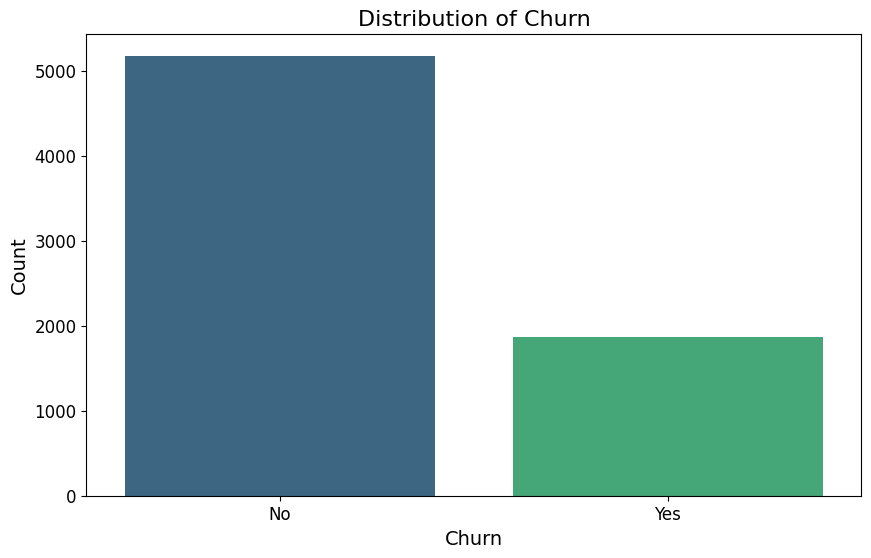

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='Churn', palette='viridis')
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

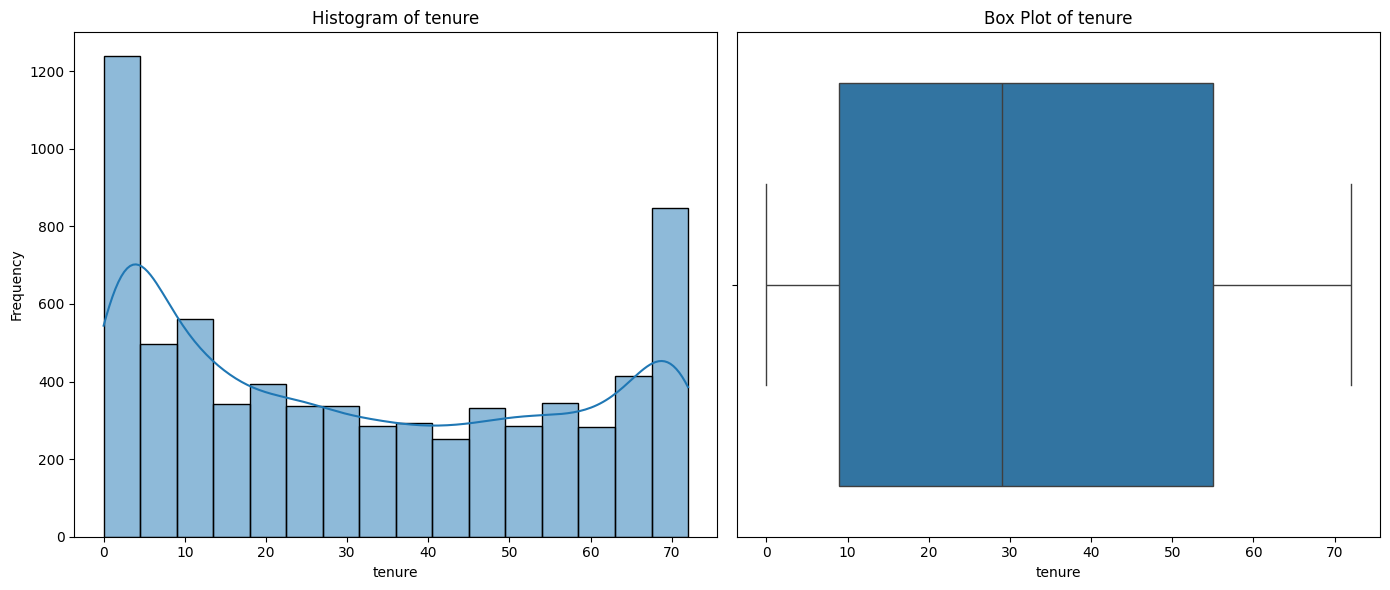

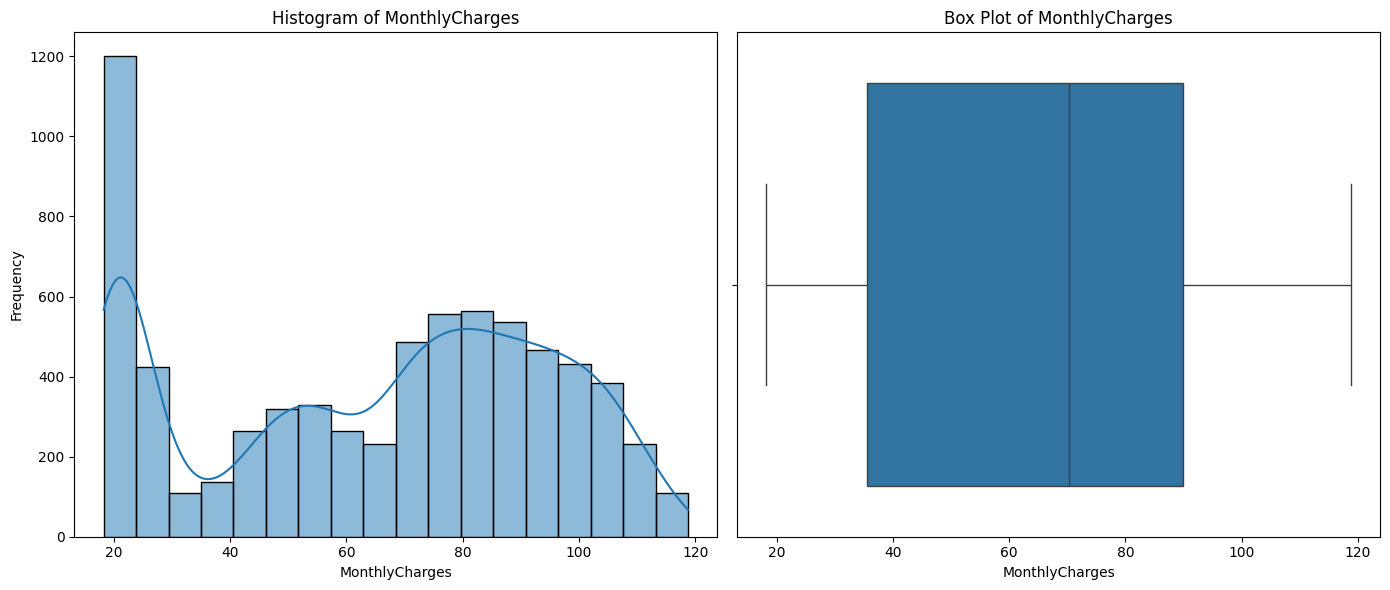

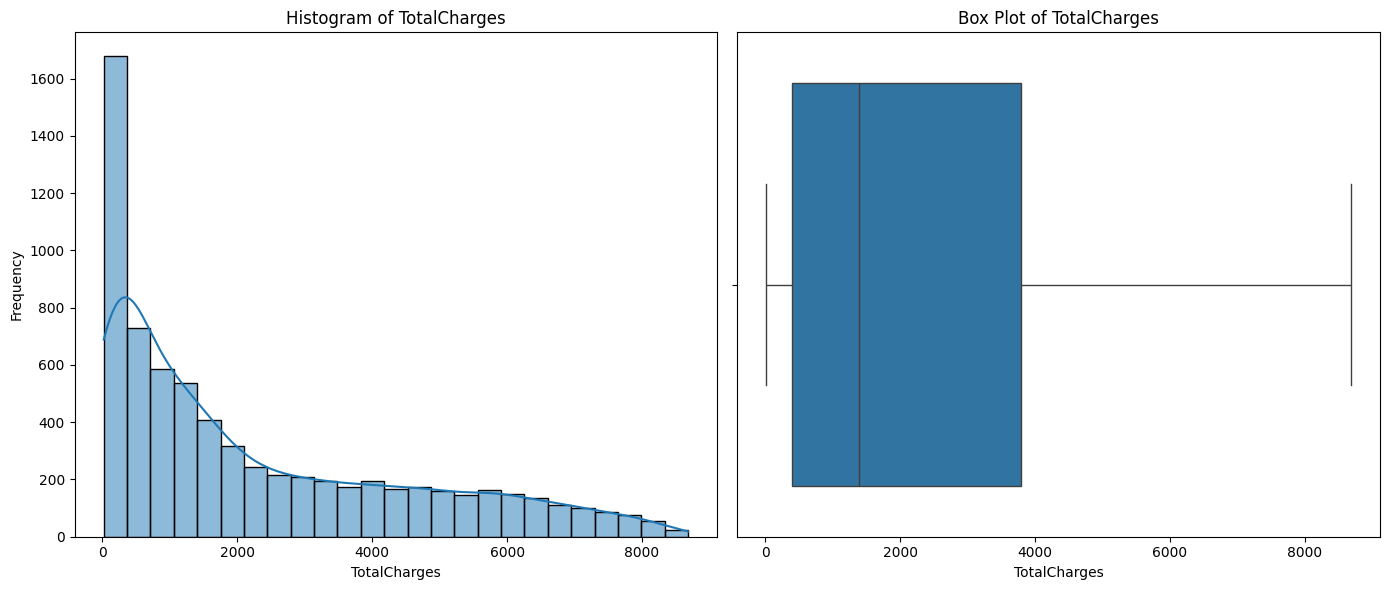

In [28]:
numerical_columns = new_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


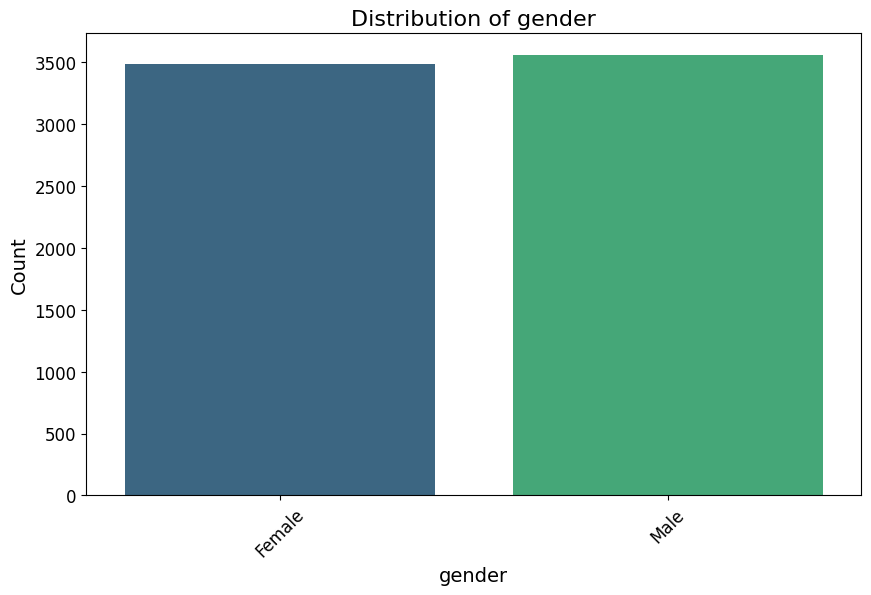

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


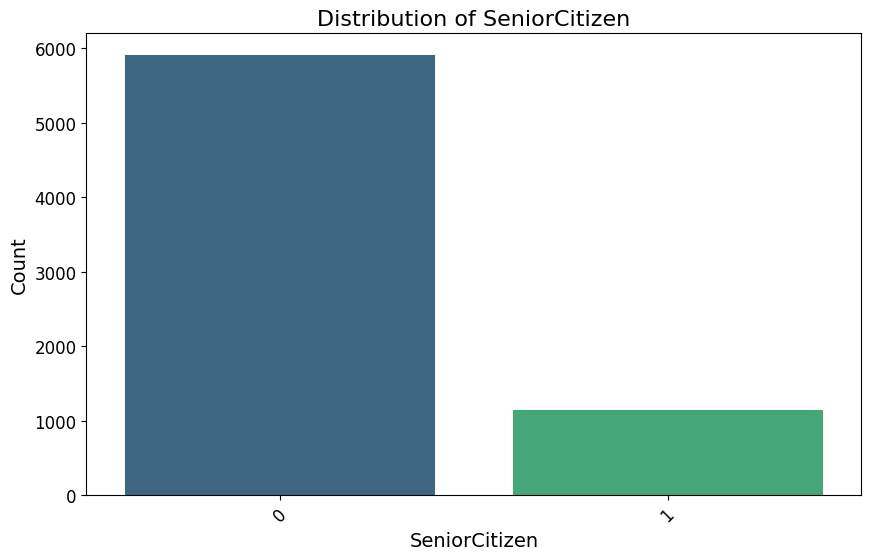

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


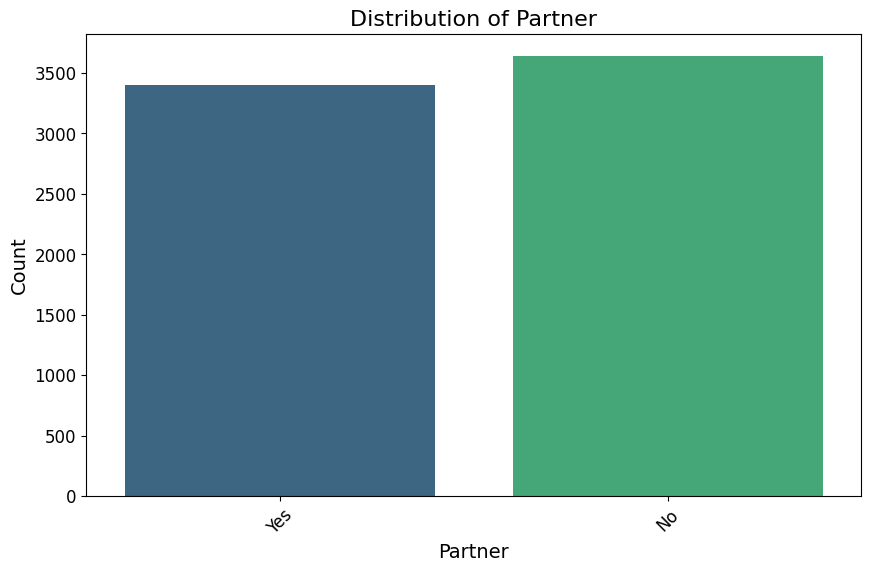

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


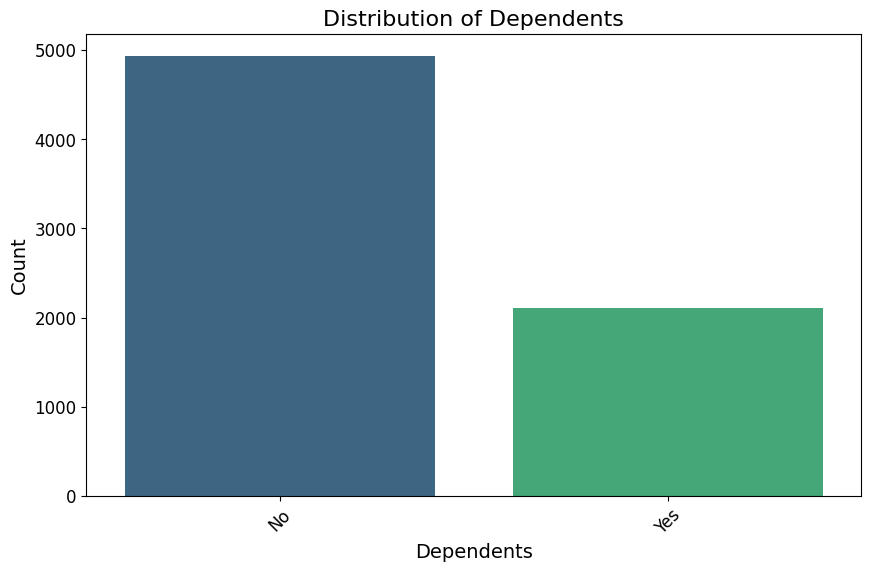

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


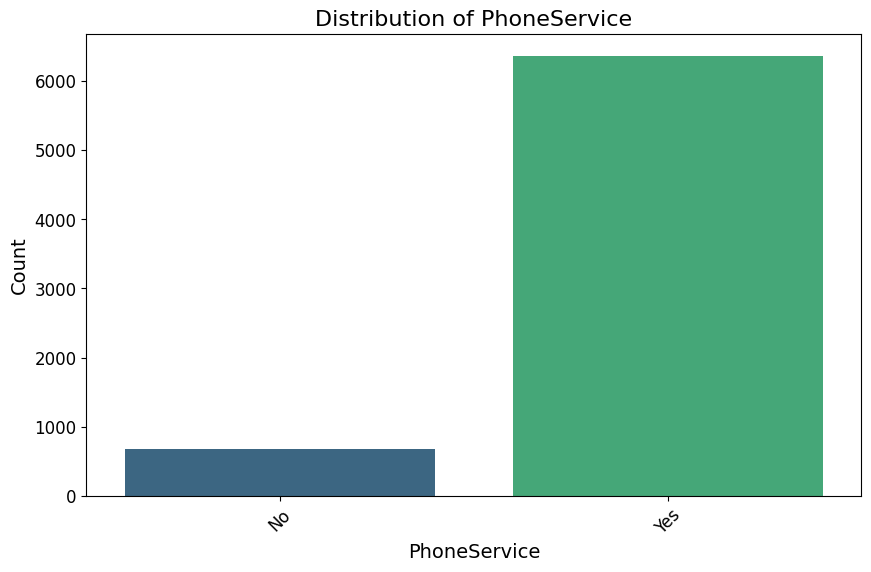

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


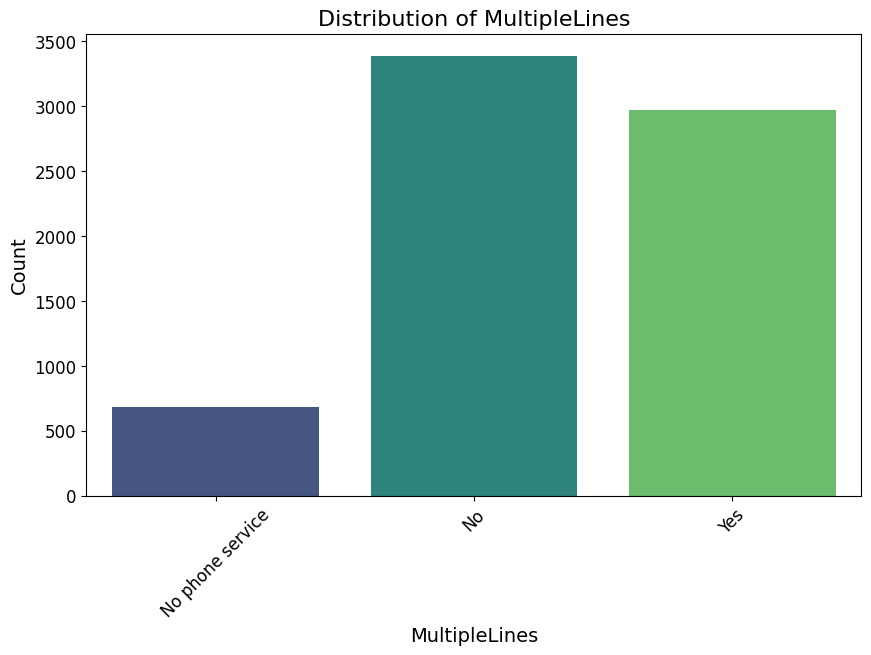

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


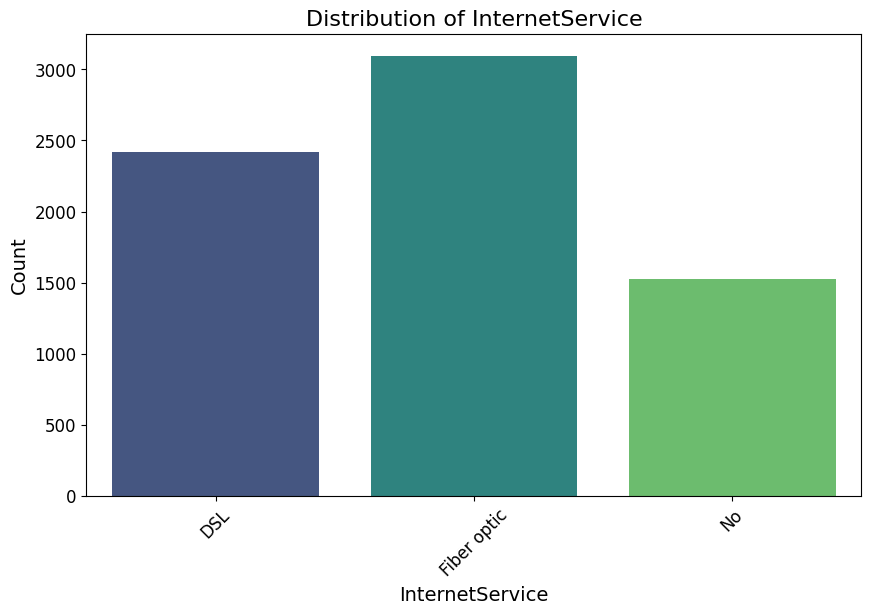

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


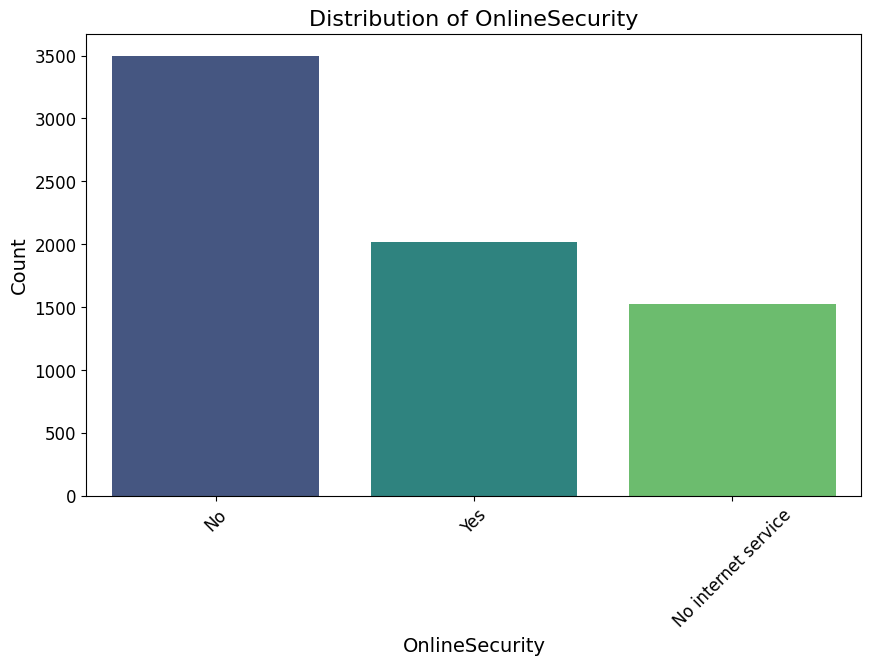

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


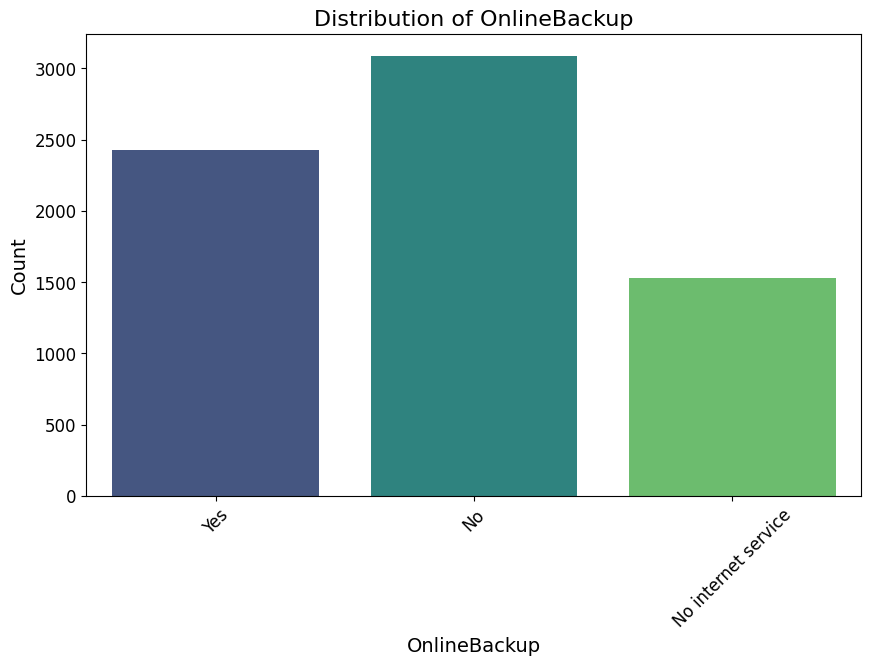

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


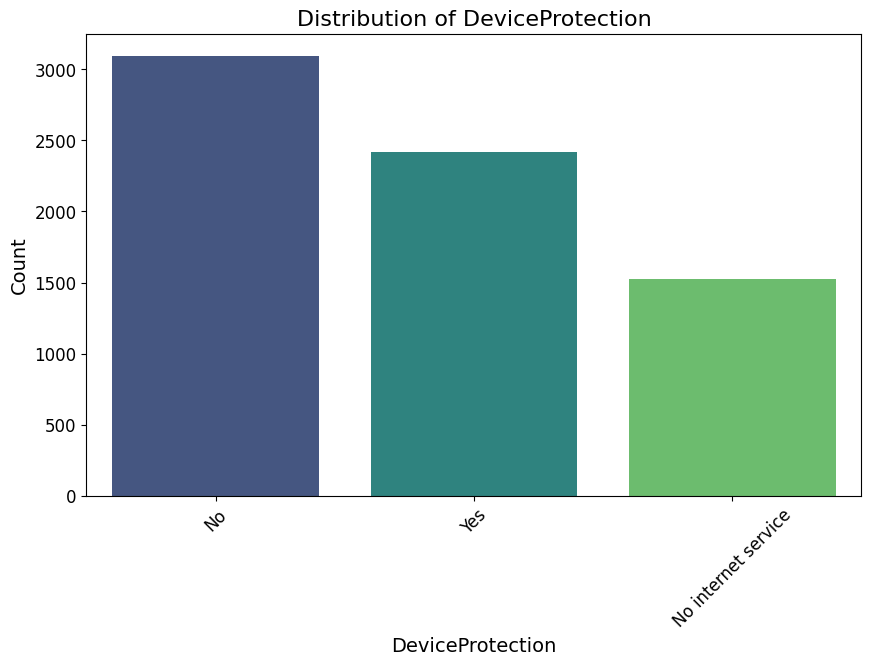

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


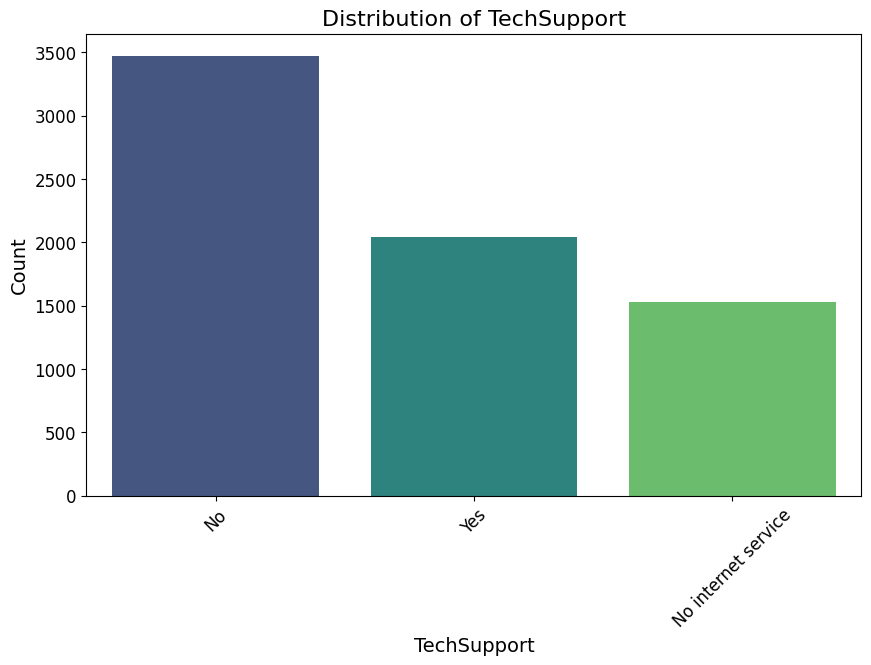

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


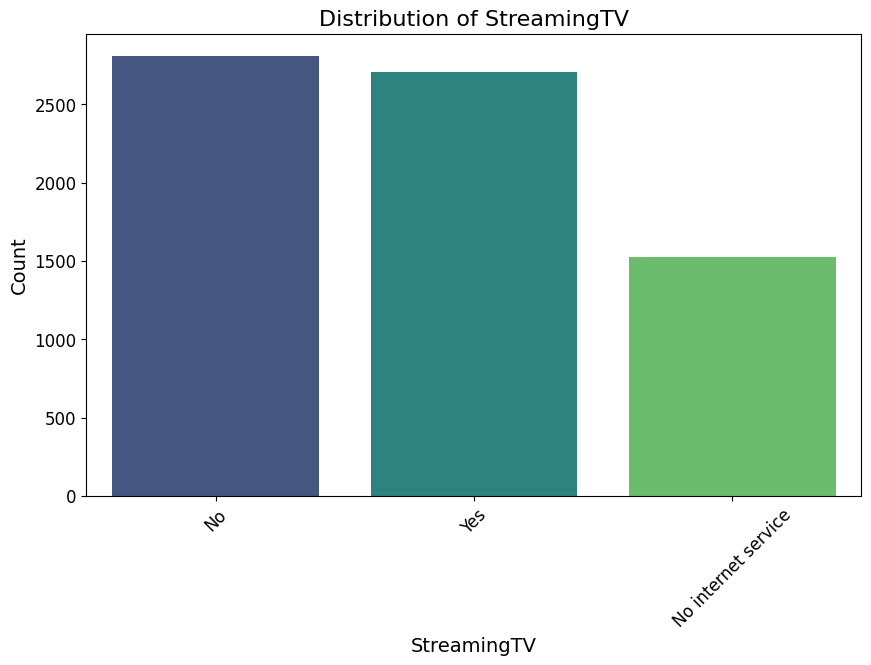

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


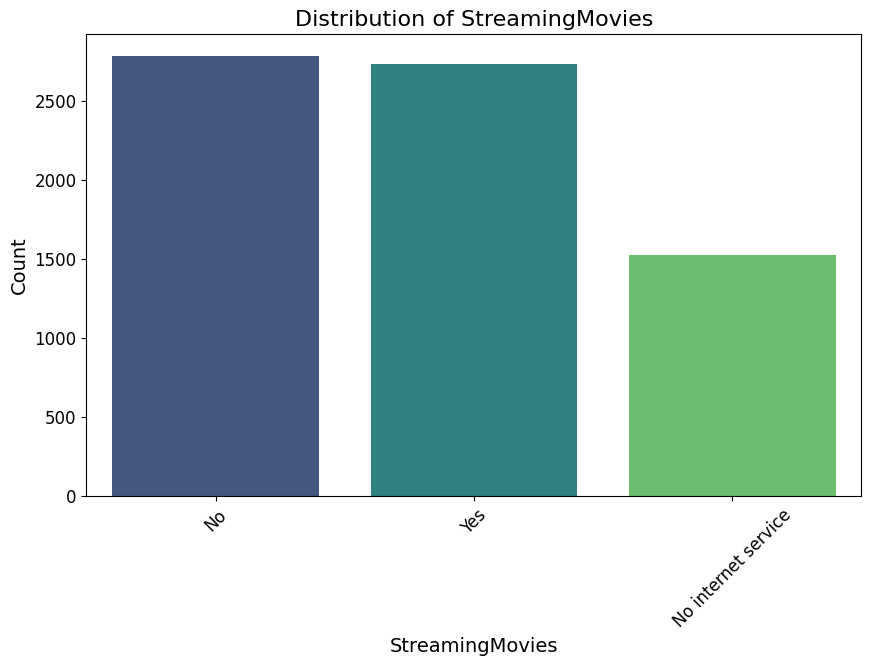

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


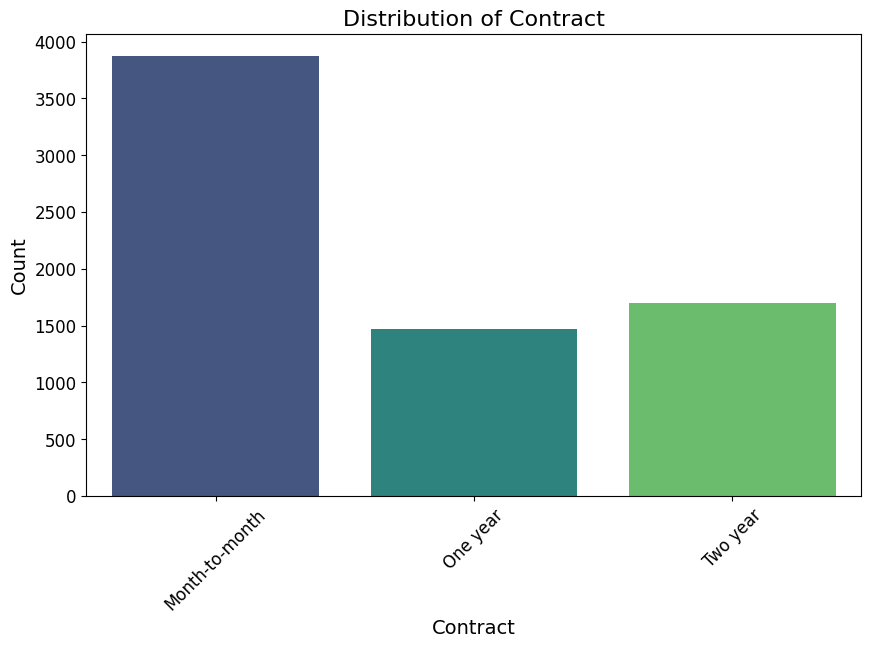

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


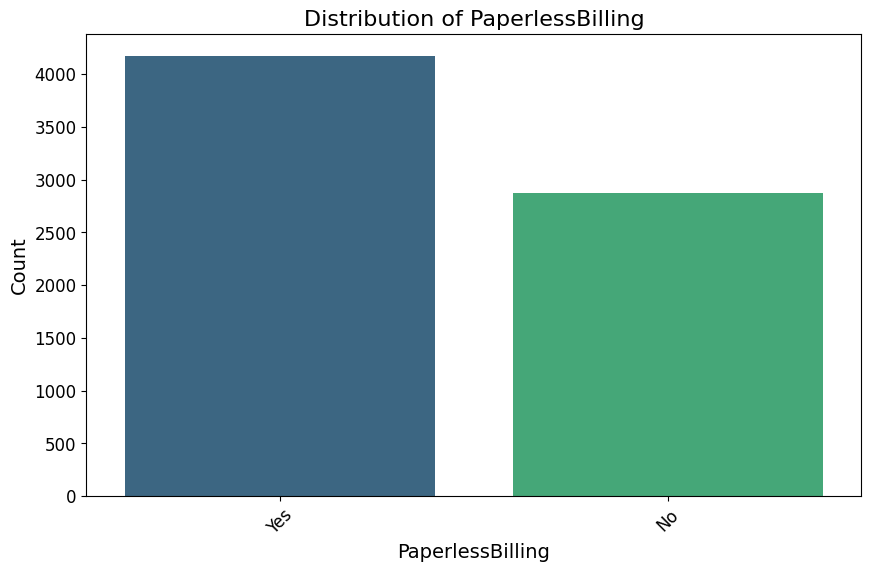

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


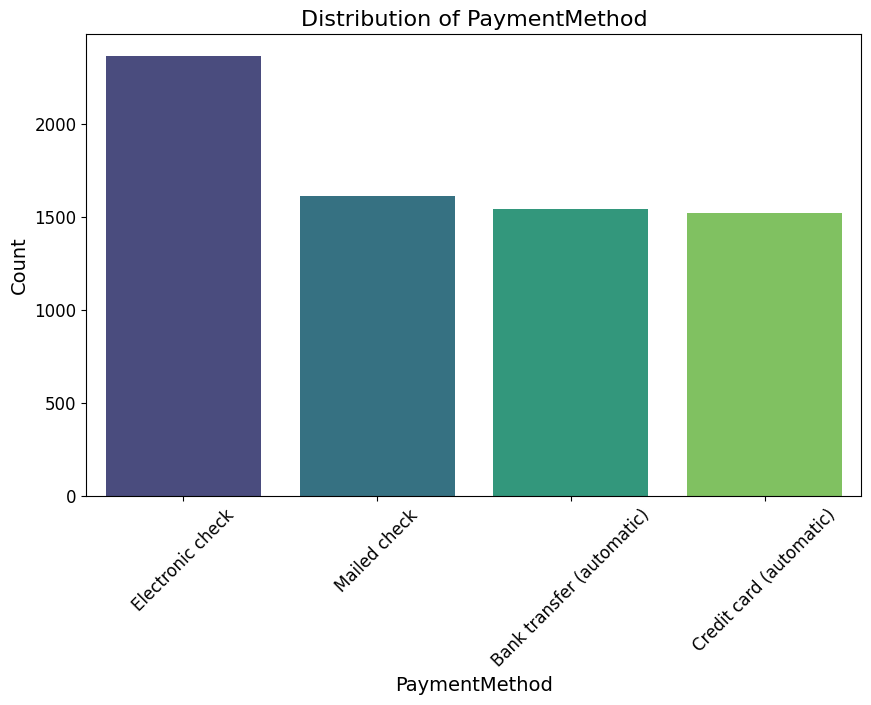

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


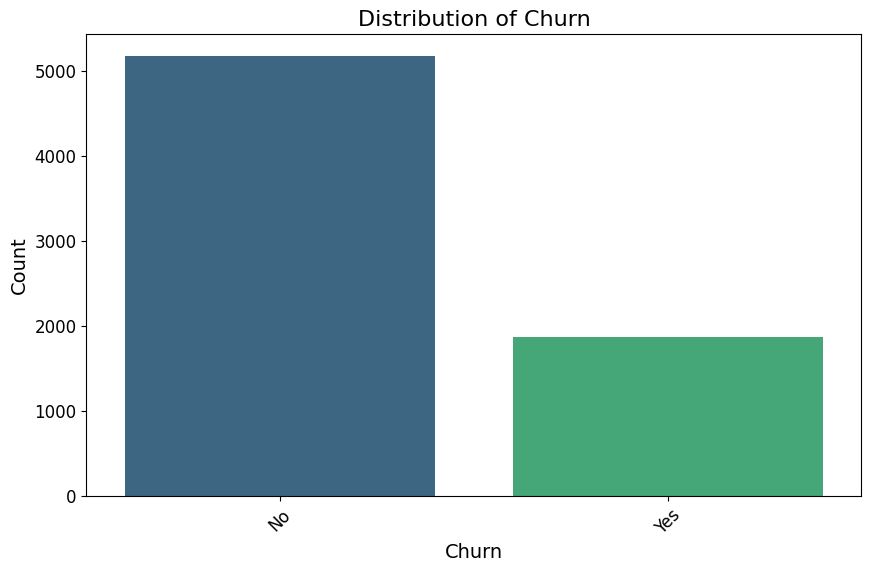

In [29]:
object_columns = new_data.select_dtypes(include='object').columns
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


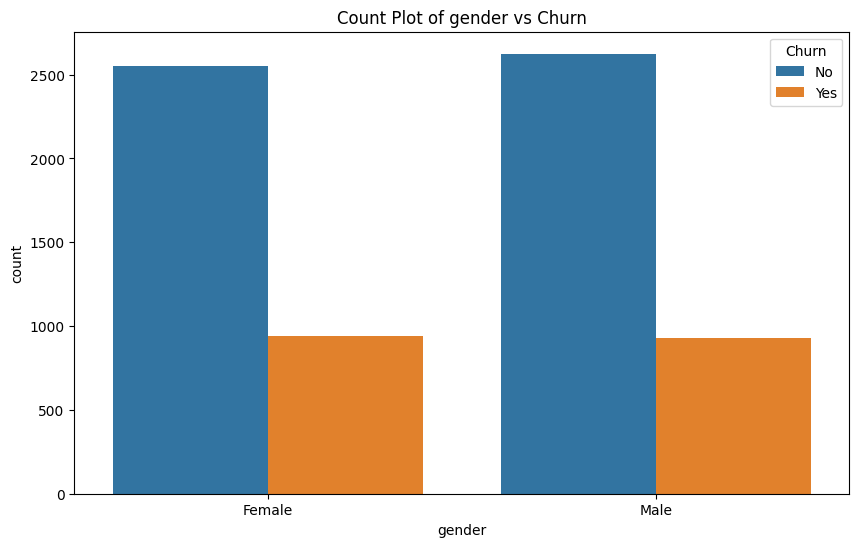

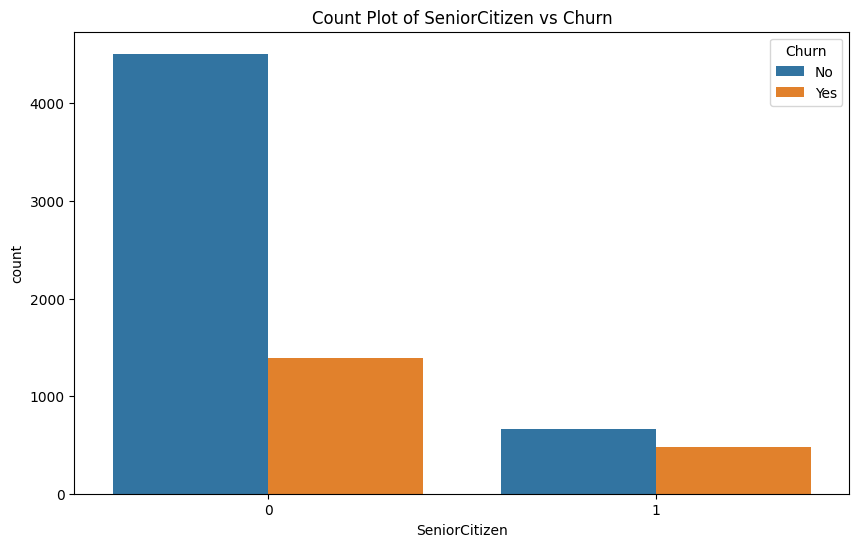

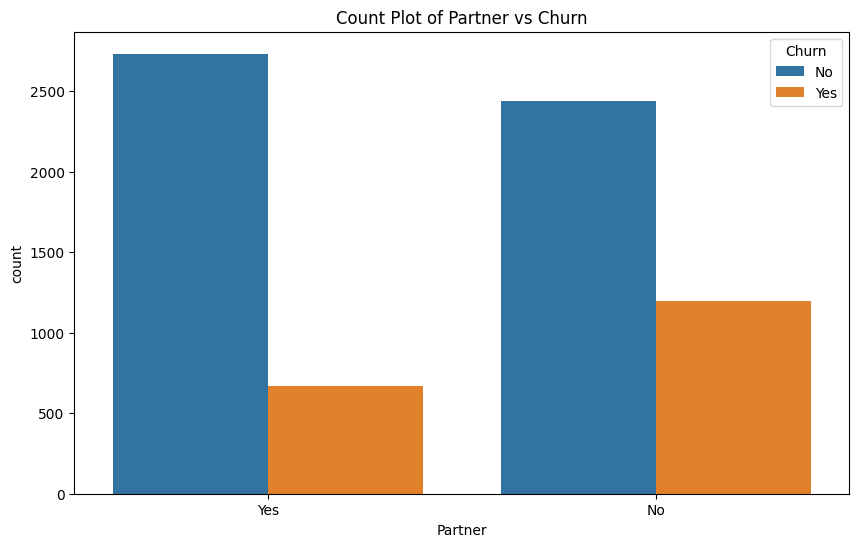

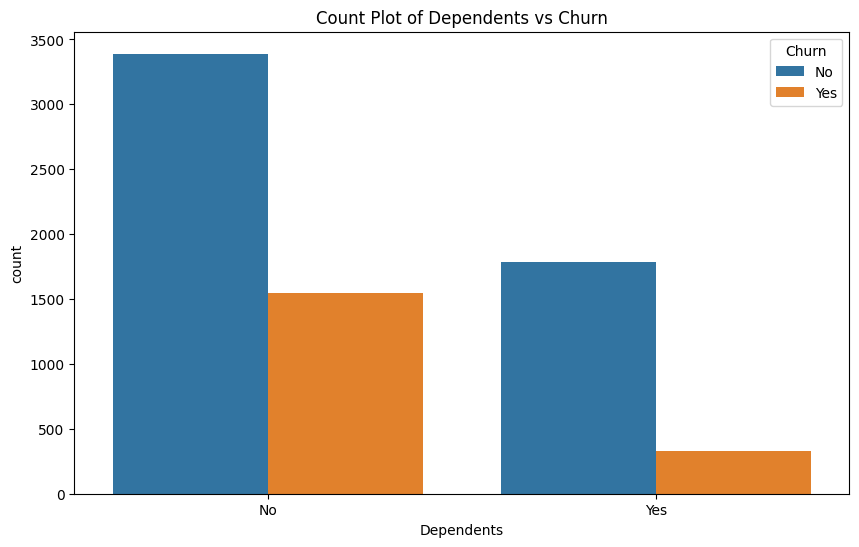

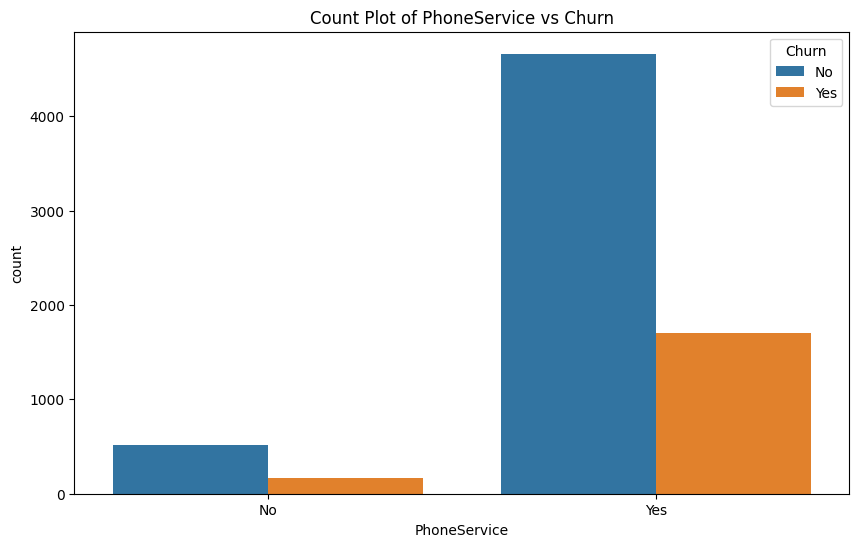

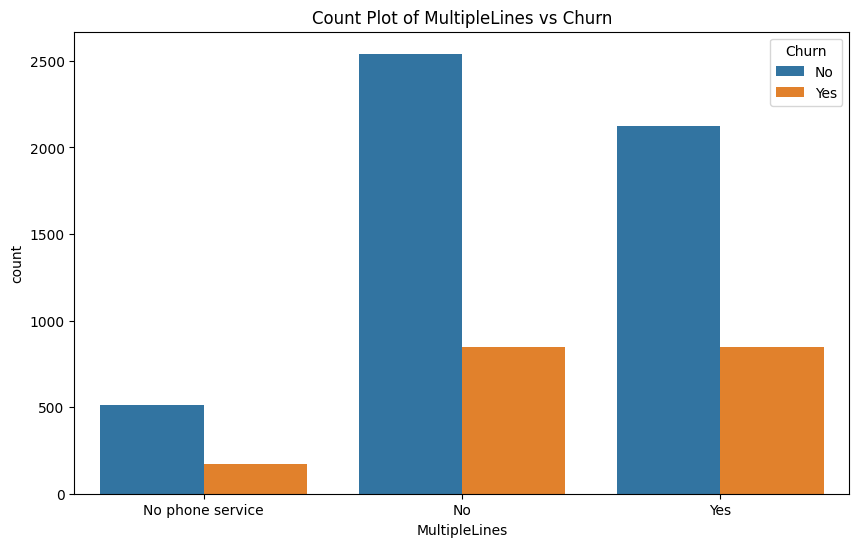

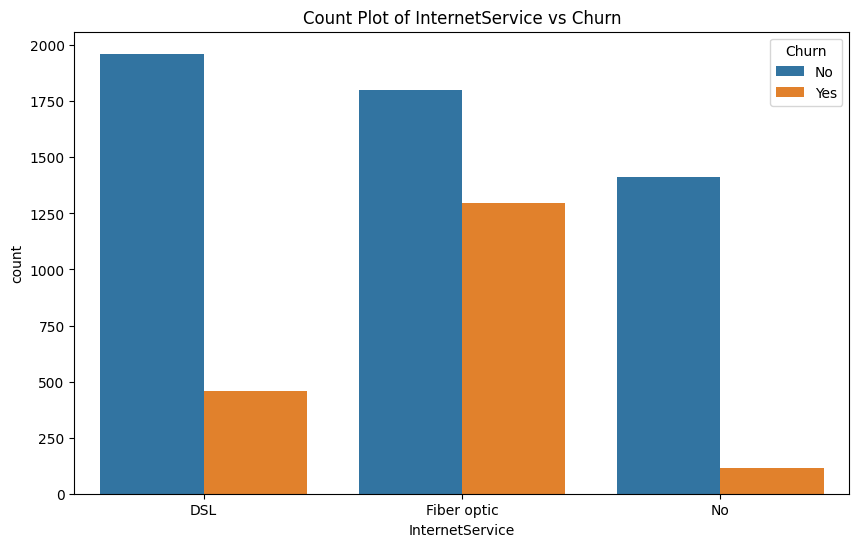

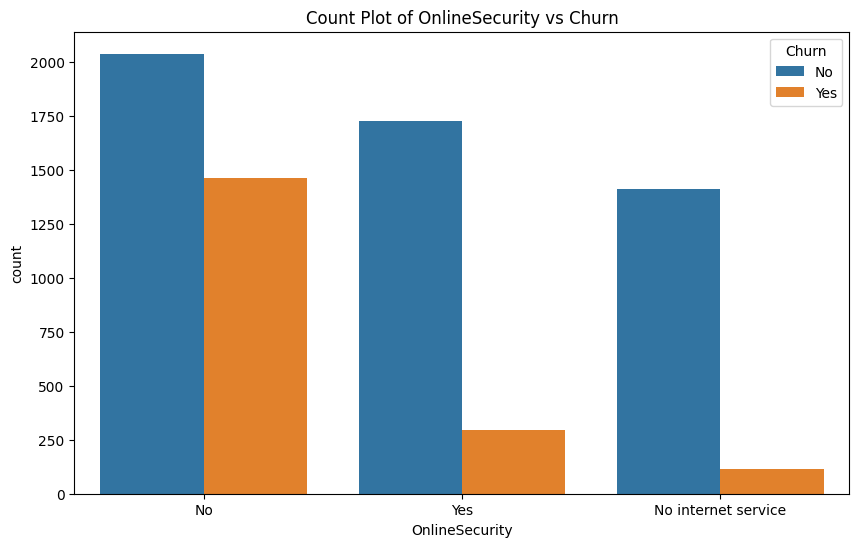

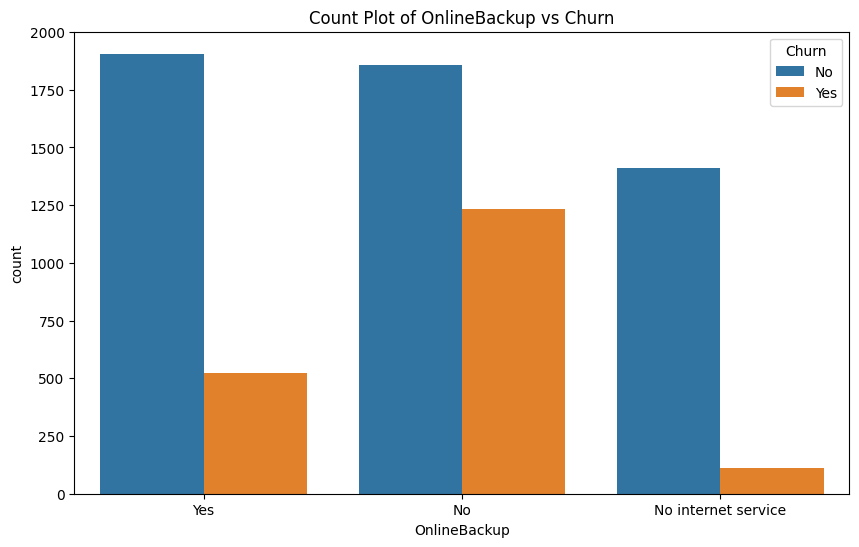

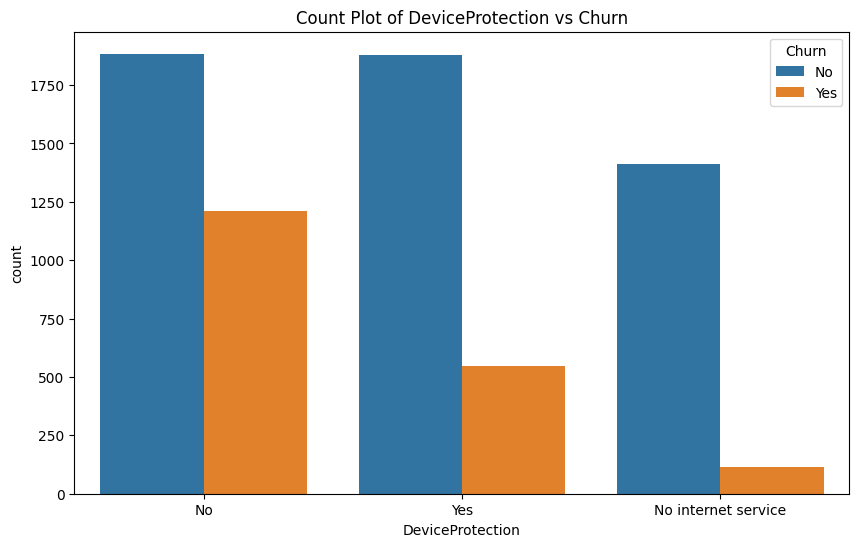

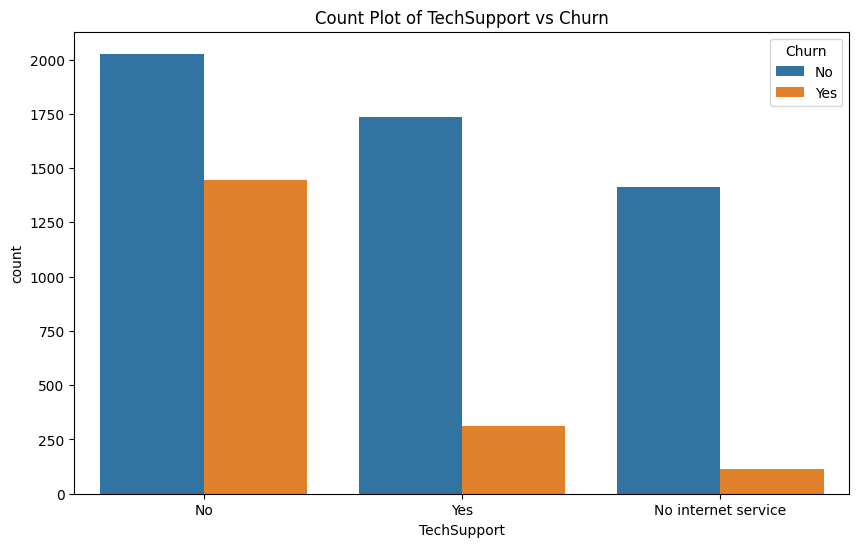

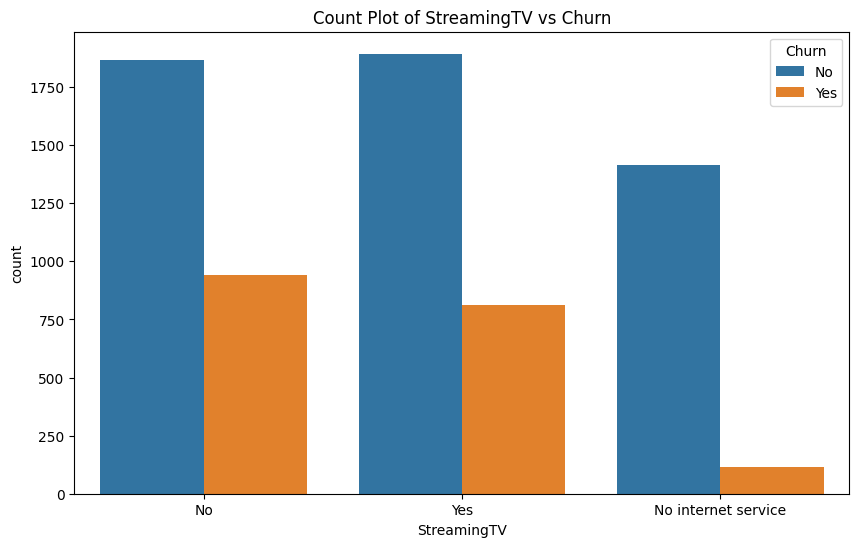

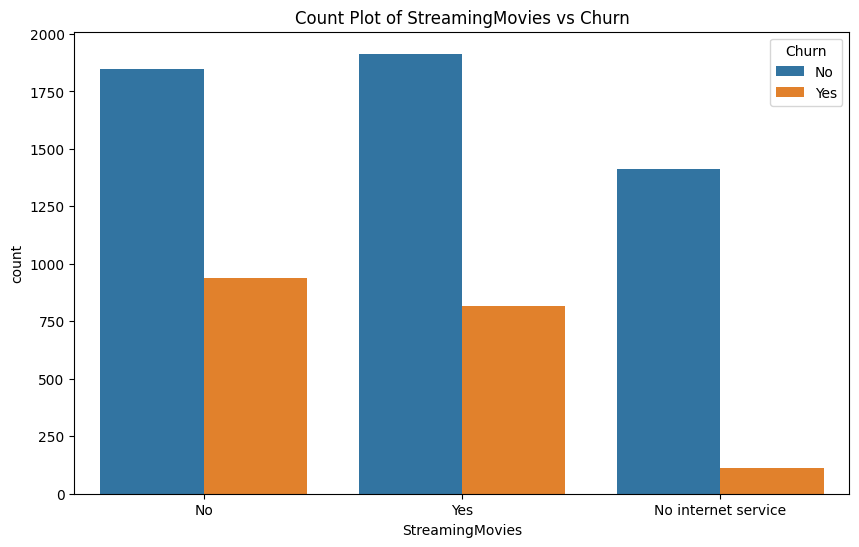

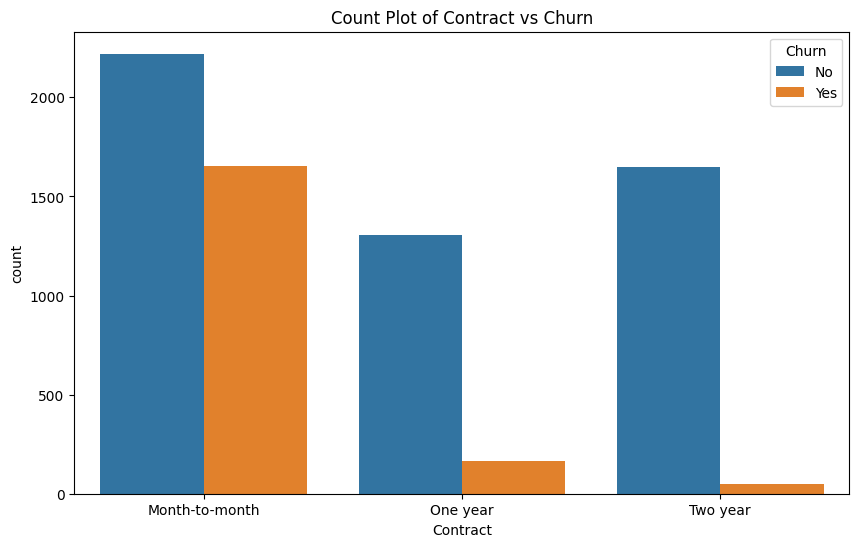

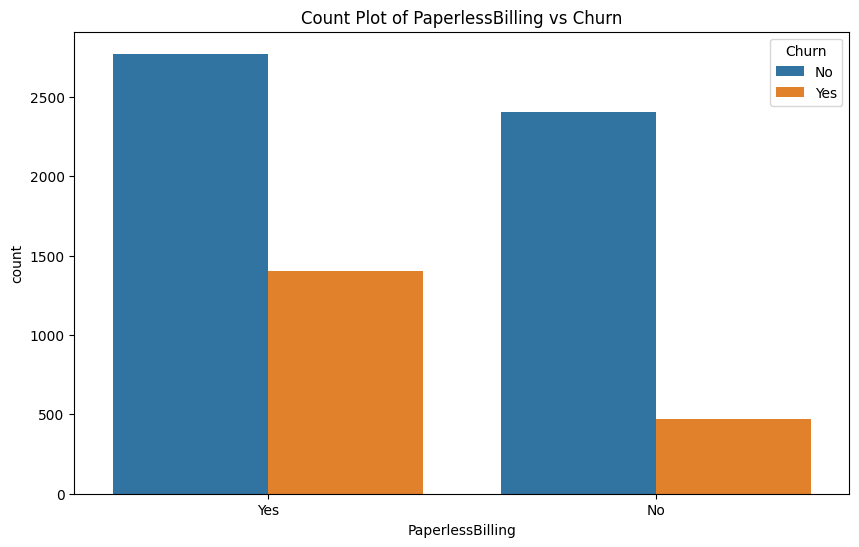

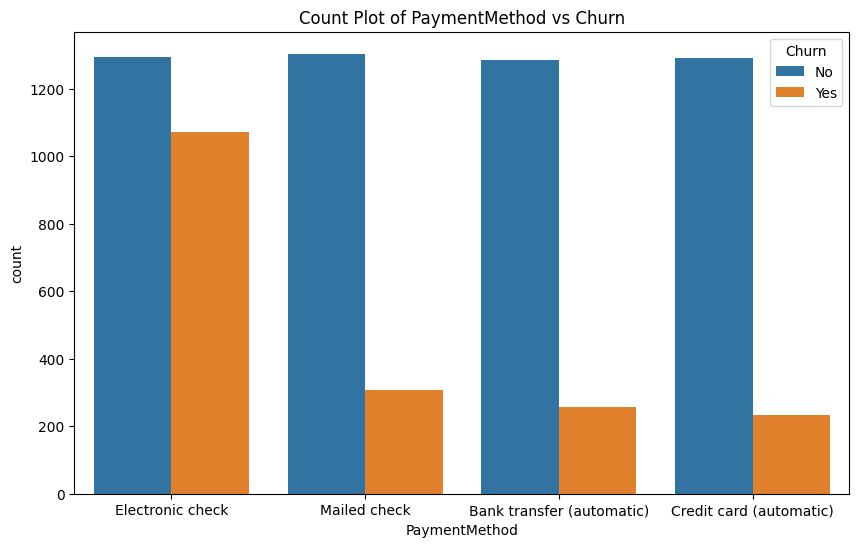

In [73]:
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, hue='Churn')
    plt.title(f'Count Plot of {column} vs Churn')
    plt.show()

In [ ]:
table = pd.crosstab(df['Gender'], df['Age Group'])

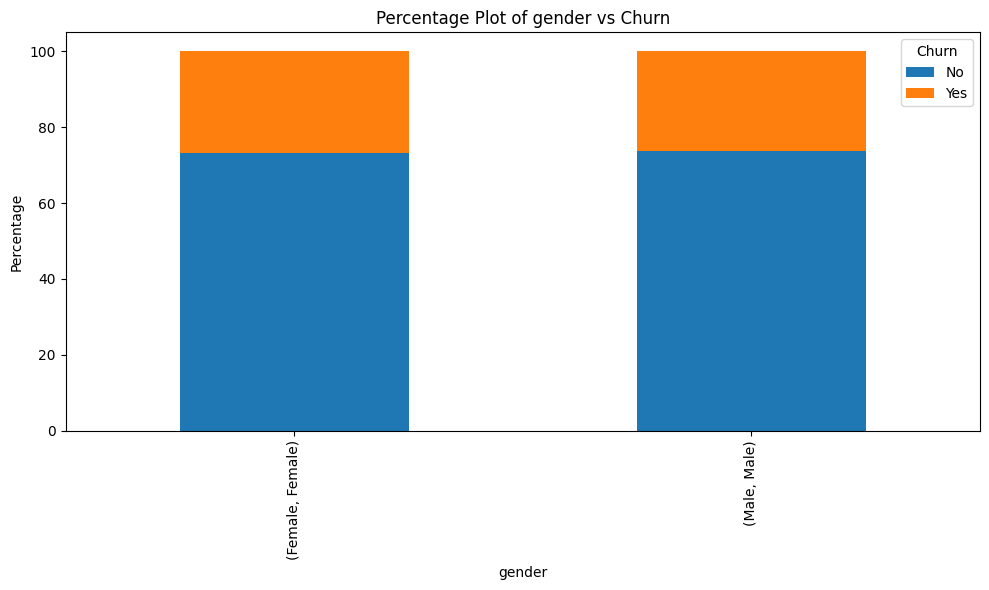

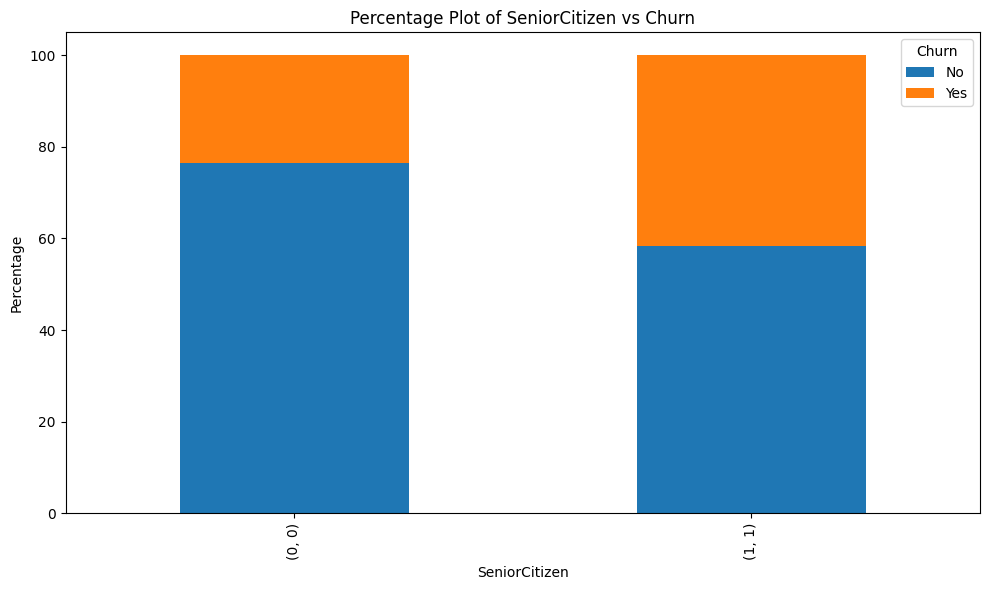

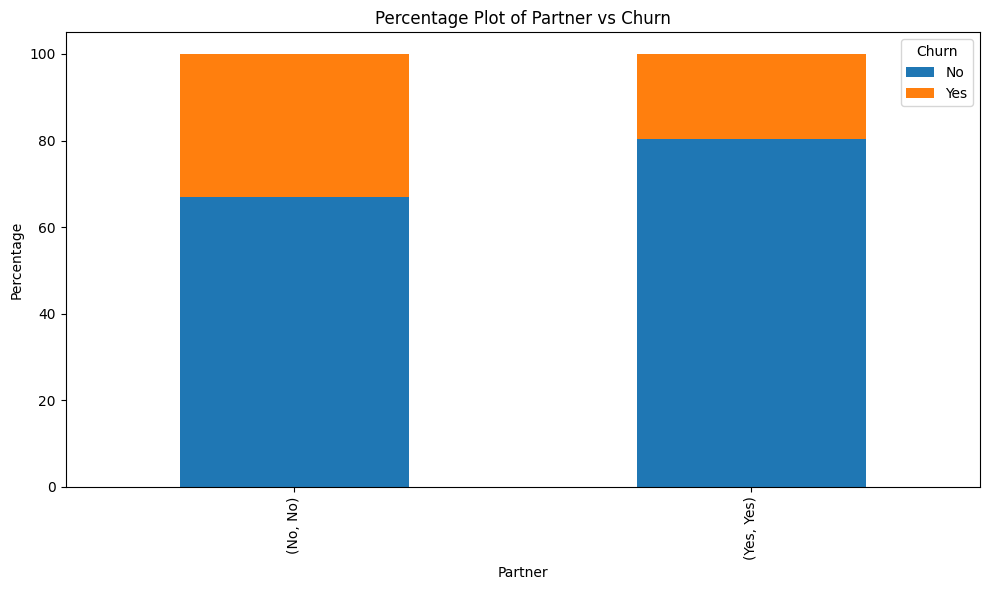

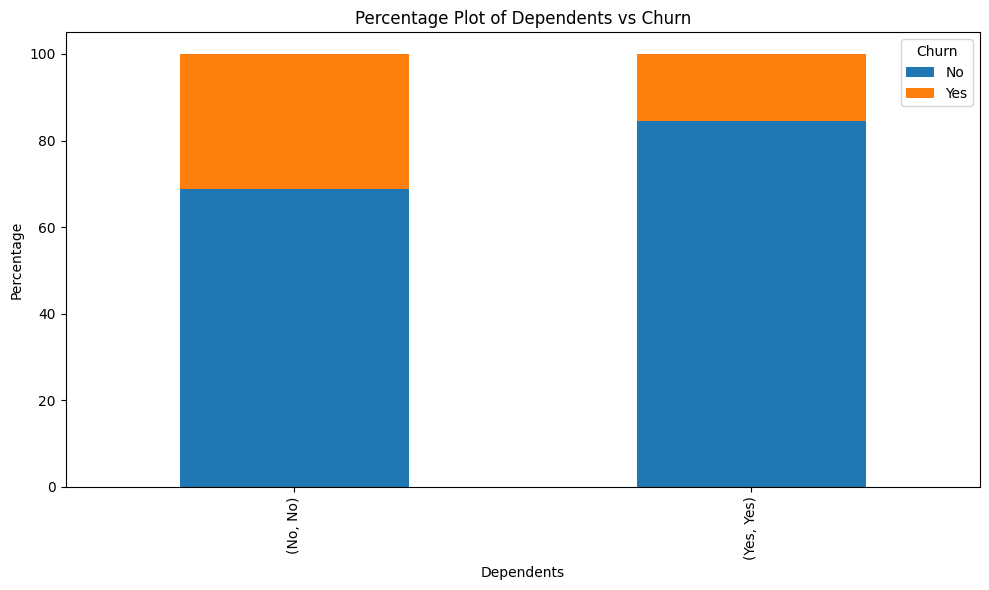

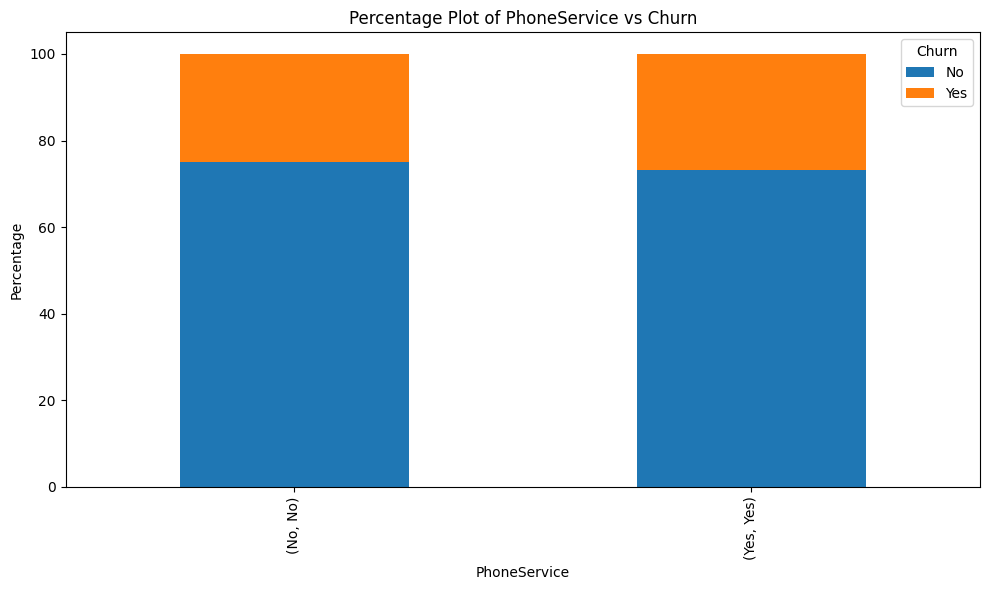

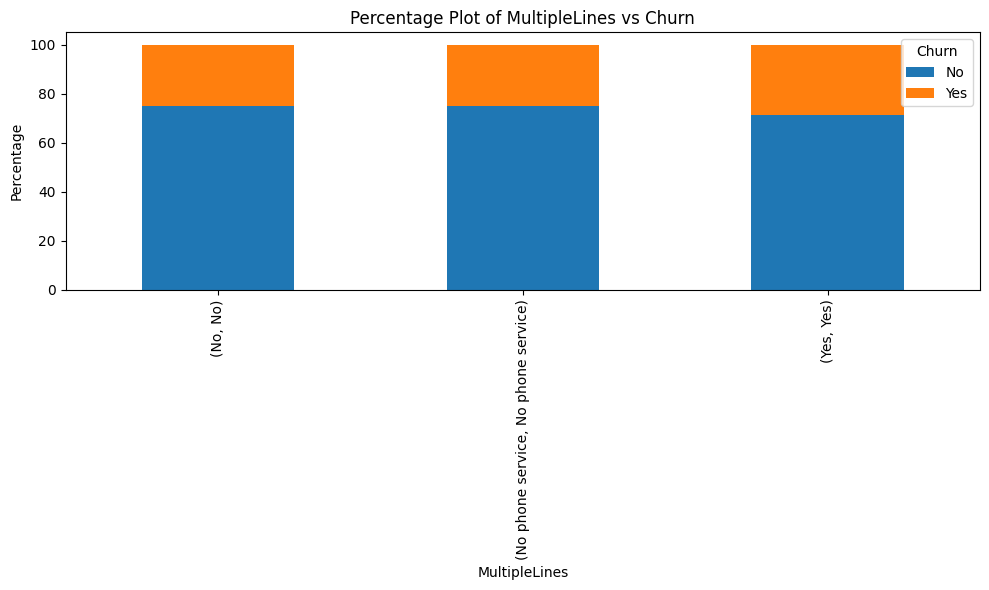

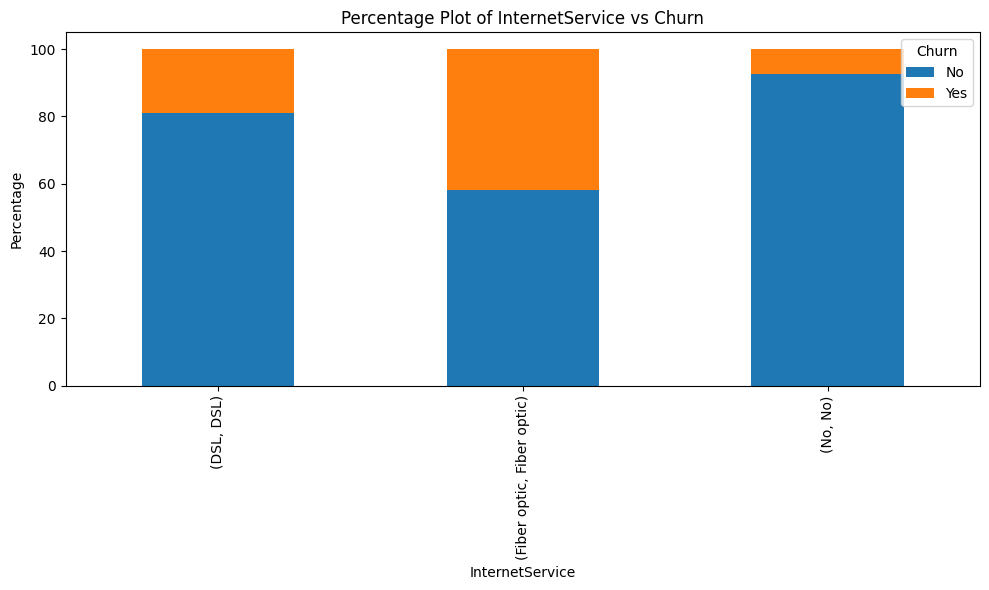

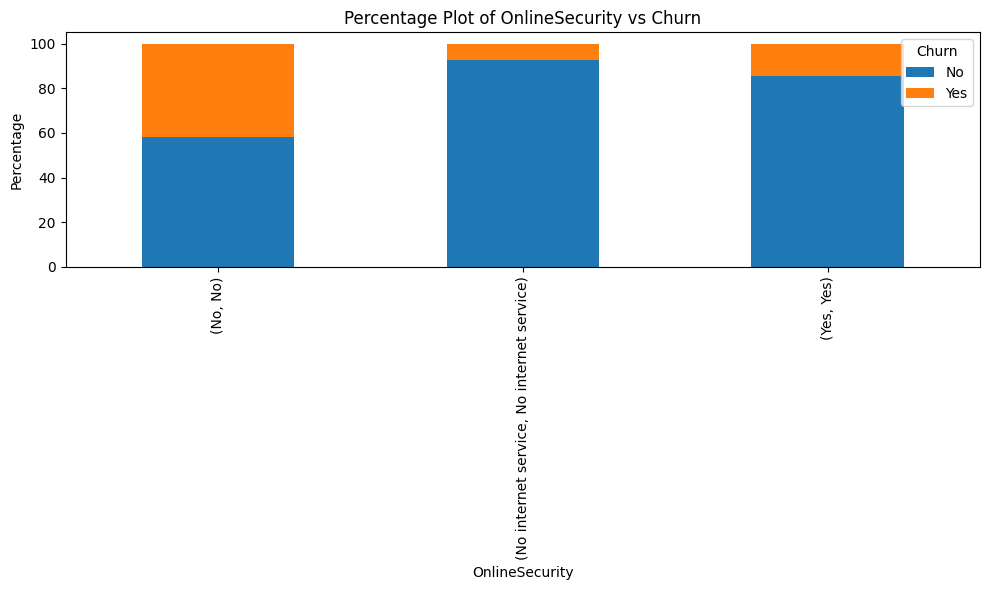

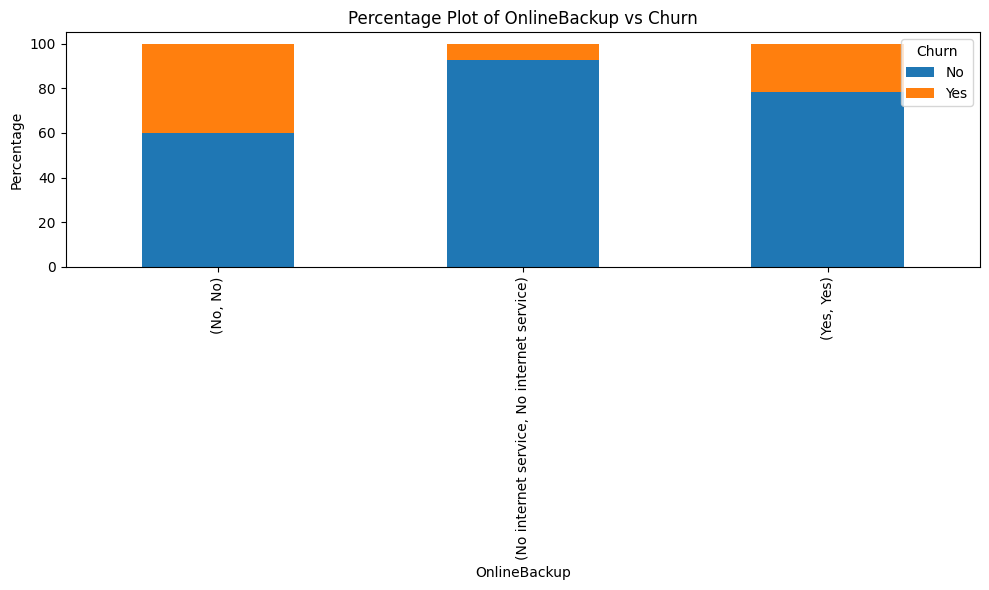

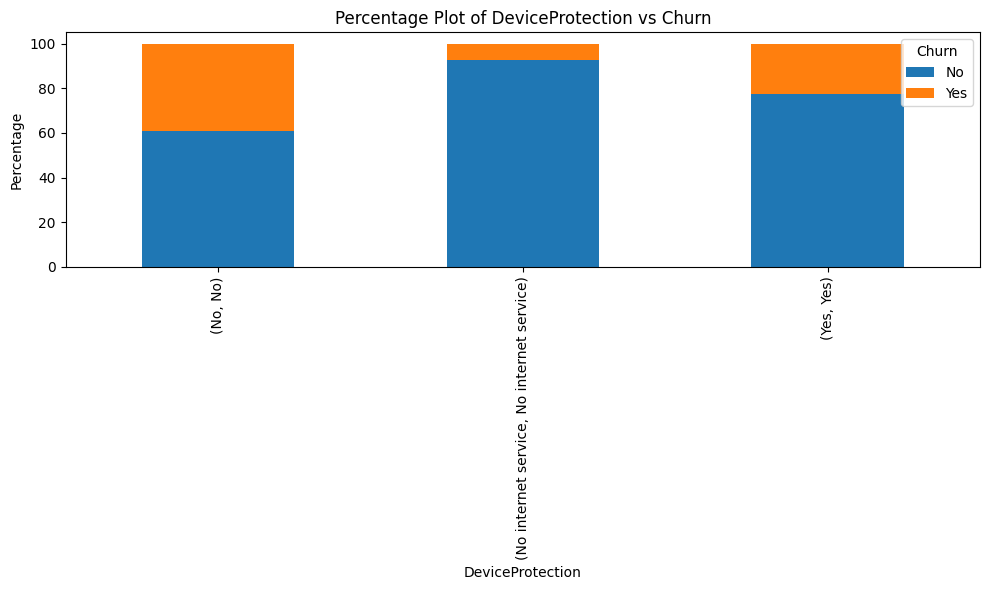

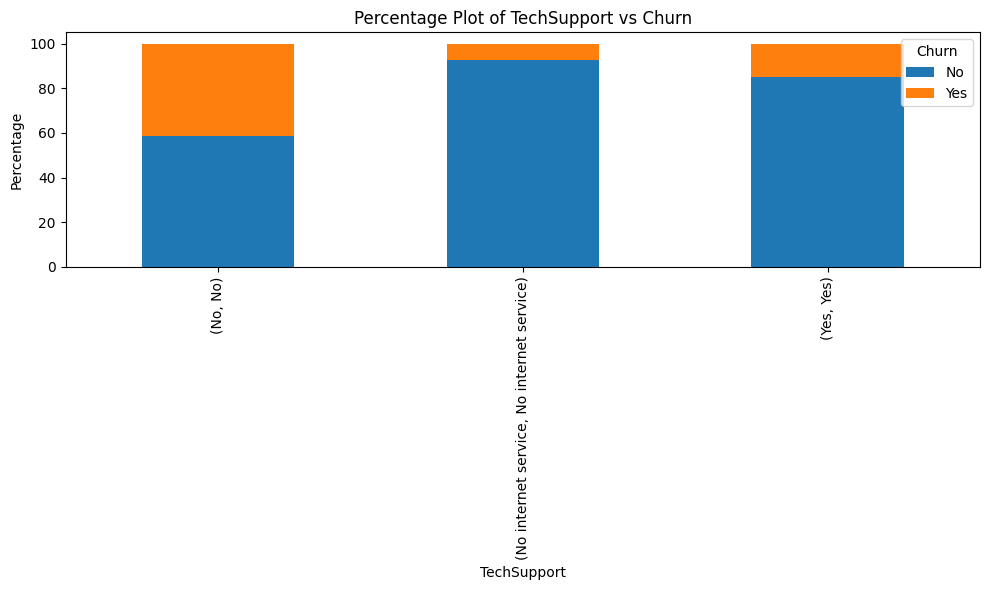

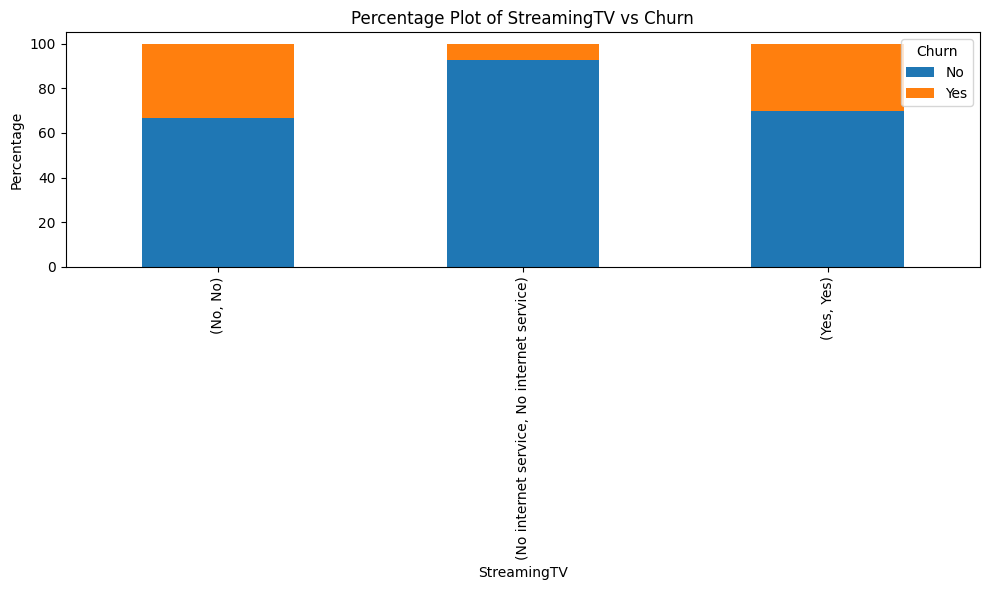

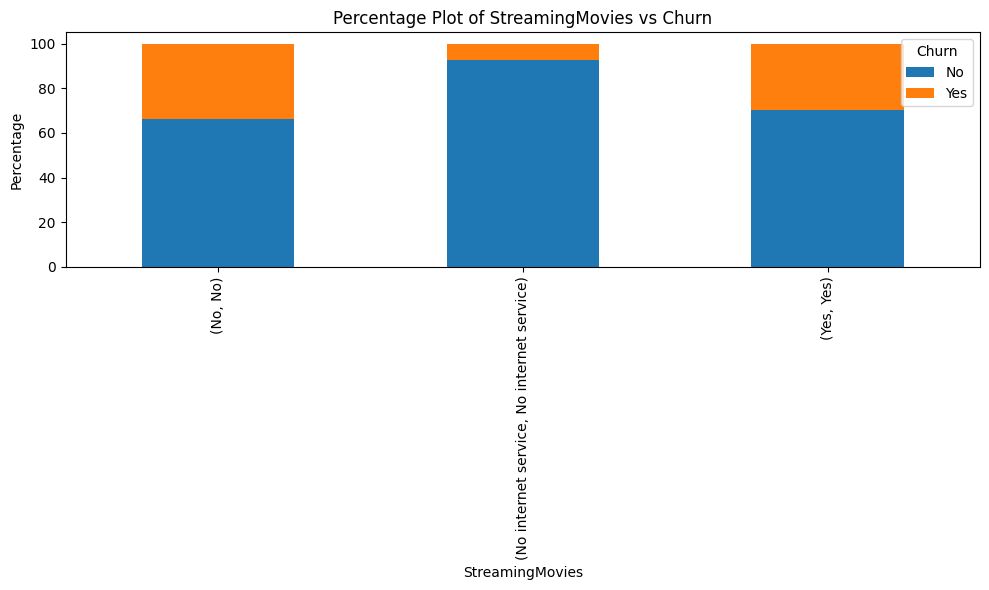

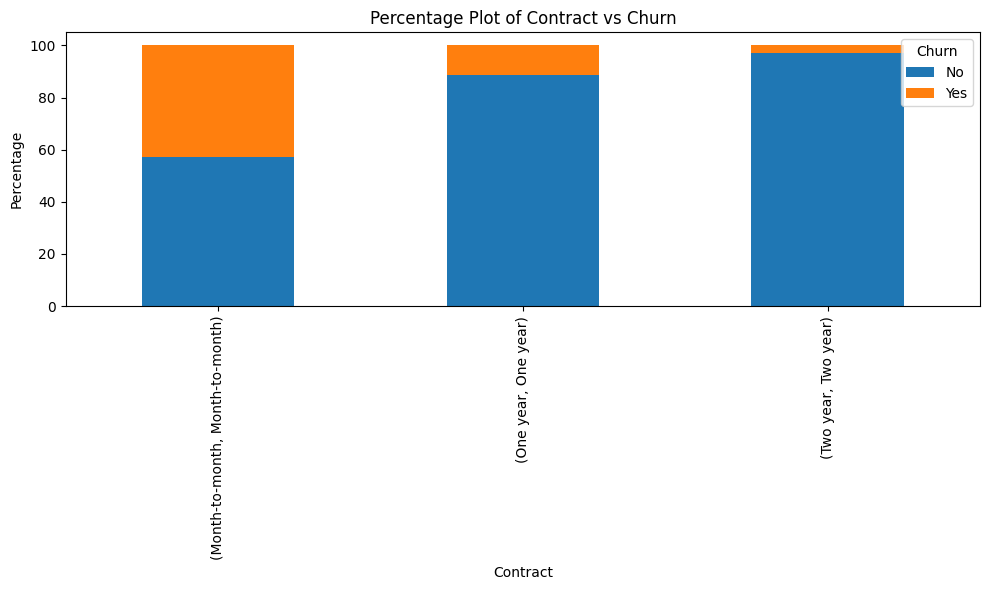

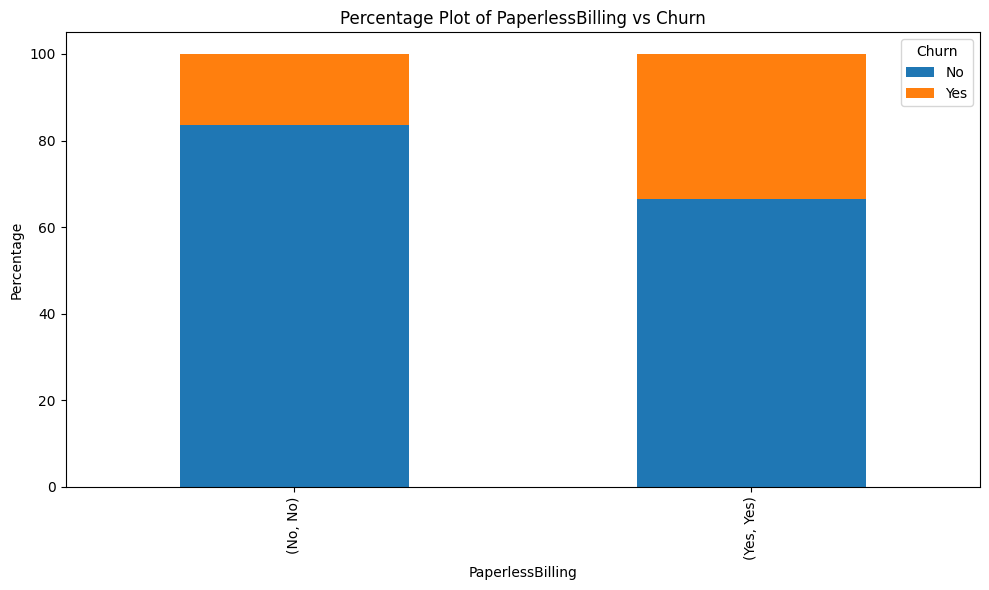

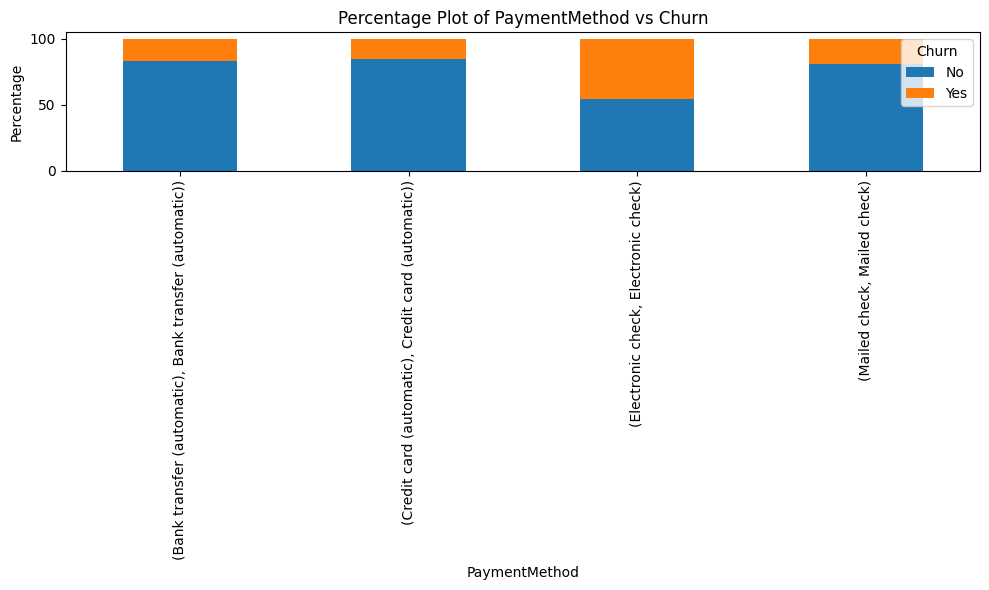

In [53]:
import matplotlib.pyplot as plt

for column in object_columns:
    # Compute normalized percentages with MultiIndex
    churn_percentage = (
        new_data.groupby([column, 'Churn'])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum()) * 100
    )

    # Unstack to create a DataFrame
    churn_percentage = churn_percentage.unstack()

    # Plot the percentage plot
    churn_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Percentage Plot of {column} vs Churn')
    plt.ylabel('Percentage')
    plt.xlabel(column)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

Outliers in tenure:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []




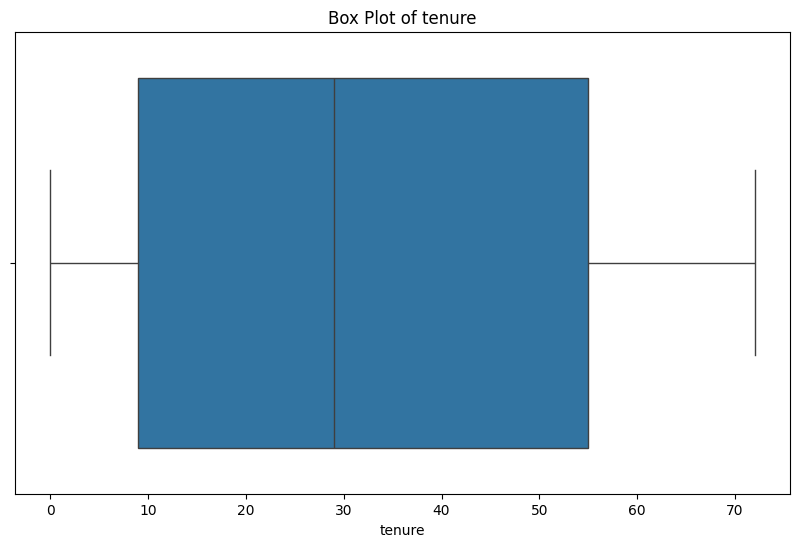

Outliers in MonthlyCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []




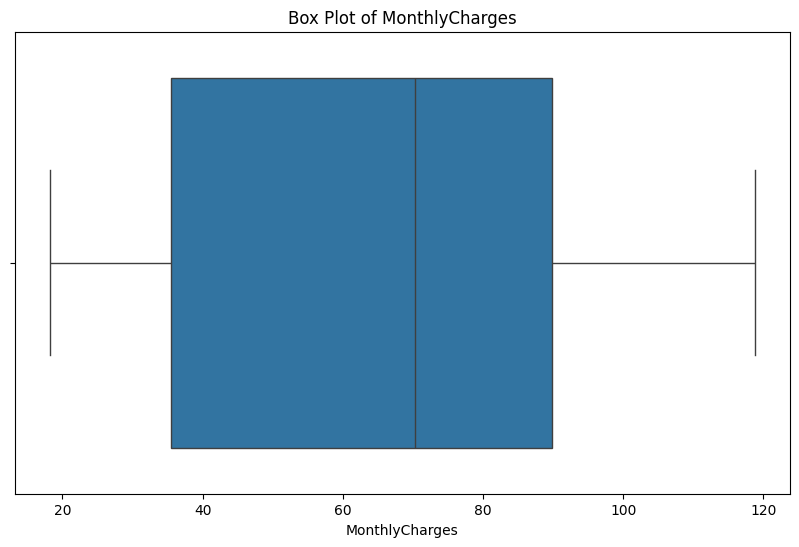

Outliers in TotalCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []




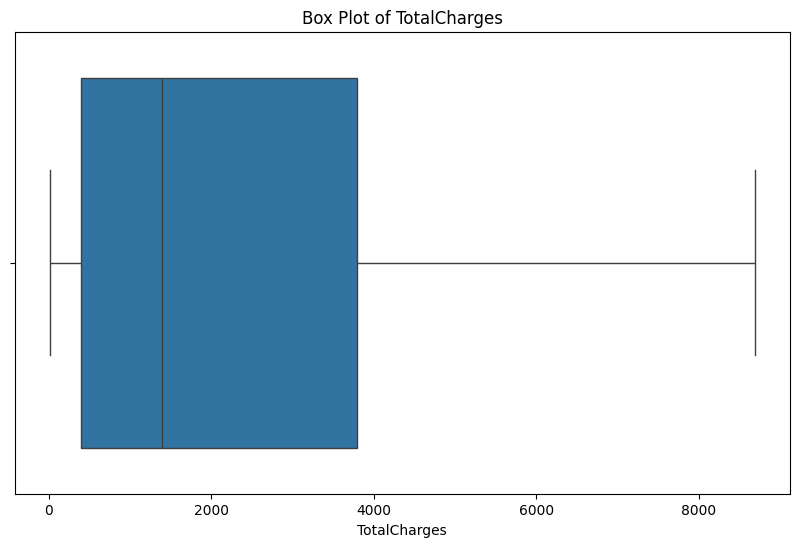

In [63]:
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# Find outliers in each numeric column
for column in numeric_columns:
    outliers = find_outliers(new_data, column)
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=new_data, x=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

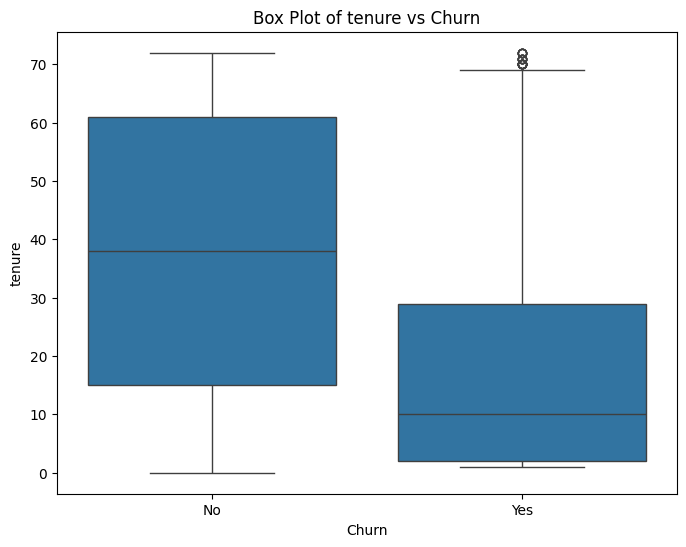

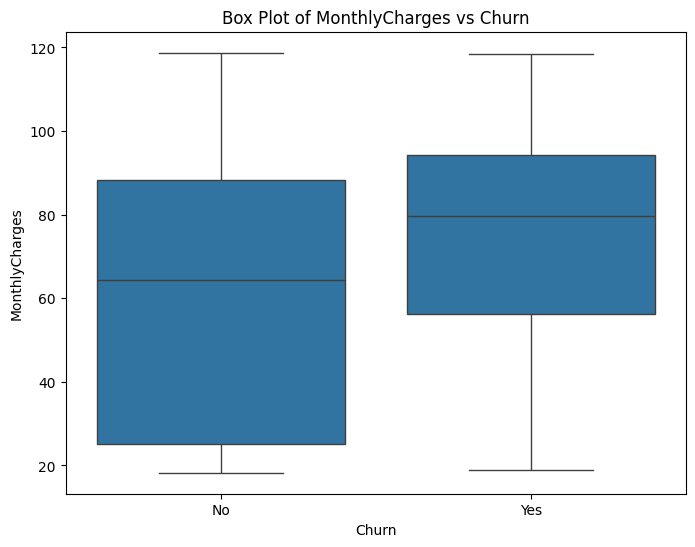

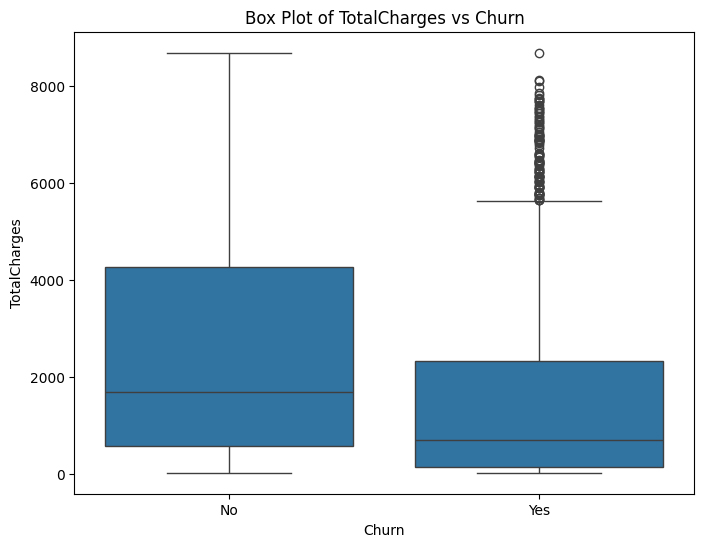

In [67]:
# Identify numerical columns
numerical_columns = new_data.select_dtypes(include=[np.number]).columns

# Perform bivariate analysis on numerical columns vs Churn
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column, data=new_data)
    plt.title(f'Box Plot of {column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


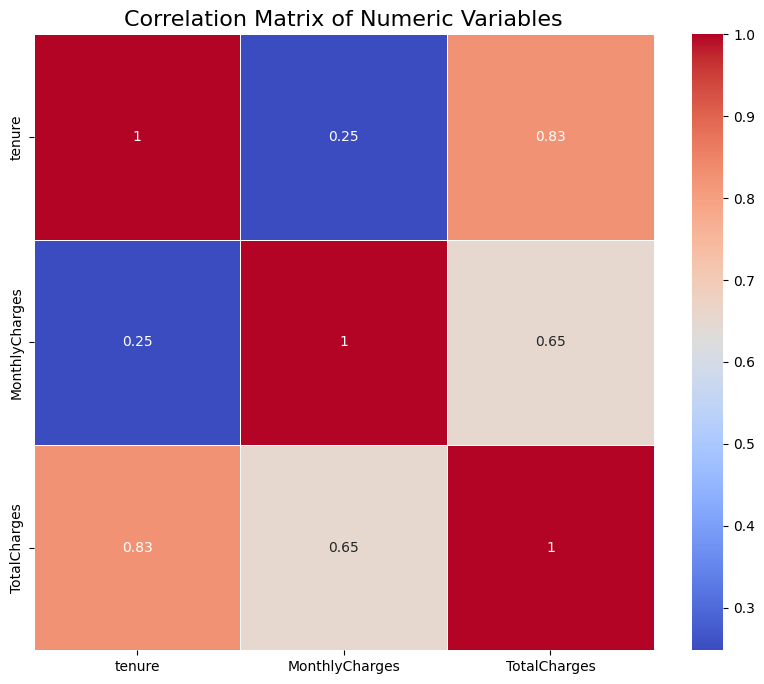

In [70]:
correlation_matrix = new_data[numerical_columns].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.show()

In [68]:
from scipy.stats import chi2_contingency


# Perform Chi-square test for each categorical variable against 'Churn'
for column in object_columns:
    contingency_table = pd.crosstab(new_data[column], new_data['Churn'])
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} vs Churn:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"There is a signicant relationship between {column} and Churn \n")
    else:
        print(f"There is no signicant relationship between {column} and Churn \n")

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi-square test for gender vs Churn:
Chi2 Statistic: 0.4840828822091383, p-value: 0.48657873605618596
There is no signicant relationship between gender and Churn 

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
Chi-square test for SeniorCitizen vs Churn:
Chi2 Statistic: 159.42630036838742, p-value: 1.5100668050923772e-36
There is a signicant relationship between SeniorCitizen and Churn 

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Chi-square test for Partner vs Churn:
Chi2 Statistic: 158.7333820309922, p-value: 2.139911344075994e-36
There is a signicant relationship between Partner and Churn 

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Chi-square test for Dependents vs Churn:
Chi2 Statistic: 189.12924940423474, p-value: 4.924921661215422e-43
There is a signicant relationship 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                             No  Yes
Phone Service Multiple Lines             
No            No phone service   512  170
Yes           No                2541  849
              Yes               2121  850


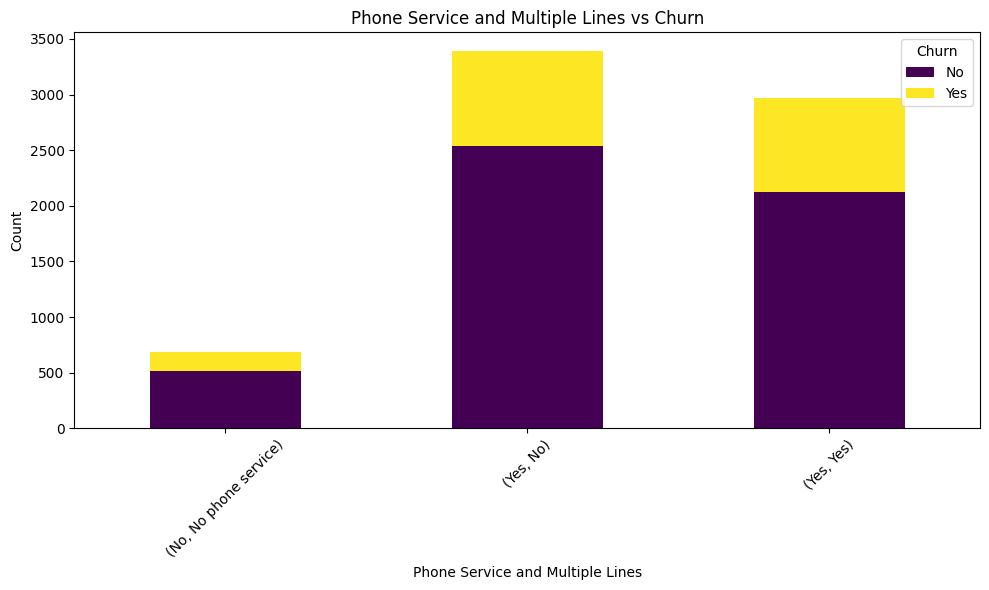

In [39]:
print(object_columns)
table = pd.crosstab(index=[new_data['PhoneService'], new_data['MultipleLines']], columns=new_data['Churn'])
table.index.names = ['Phone Service', 'Multiple Lines']
table.columns.name = 'Churn'
print(table)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Phone Service and Multiple Lines vs Churn')
plt.xlabel('Phone Service and Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                  No  Yes
InternetService StreamingTV                   
DSL             No                   1132  332
                Yes                   830  127
Fiber optic     No                    736  610
                Yes                  1063  687
No              No internet service  1413  113
Churn                                       No        Yes
InternetService StreamingTV                              
DSL             No                   77.322404  22.677596
                Yes                  86.729363  13.270637
Fiber optic     No                   54.680535  45.319465
                Yes                  60.742857  39.257143
No     

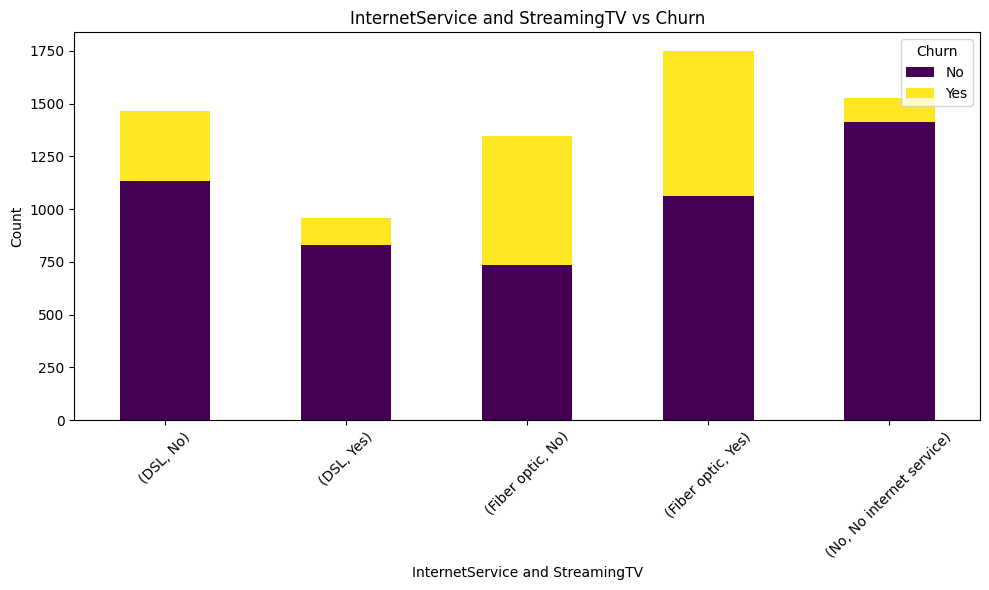

In [56]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'], new_data['StreamingTV']], columns=new_data['Churn'])
table.index.names = ['InternetService', 'StreamingTV']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService and StreamingTV vs Churn')
plt.xlabel('InternetService and StreamingTV')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                  No  Yes
InternetService StreamingMovies               
DSL             No                   1118  322
                Yes                   844  137
Fiber optic     No                    729  616
                Yes                  1070  681
No              No internet service  1413  113
Churn                                       No        Yes
InternetService StreamingMovies                          
DSL             No                   77.638889  22.361111
                Yes                  86.034659  13.965341
Fiber optic     No                   54.200743  45.799257
                Yes                  61.107938  38.892062
No     

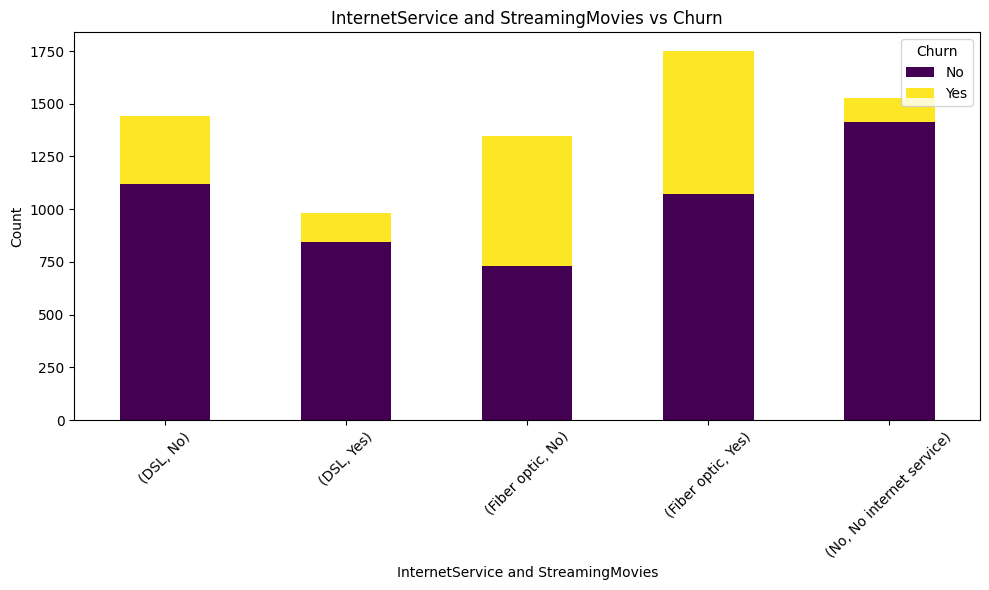

In [55]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'], new_data['StreamingMovies']], columns=new_data['Churn'])
table.index.names = ['InternetService', 'StreamingMovies']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService and StreamingMovies vs Churn')
plt.xlabel('InternetService and StreamingMovies')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                  No  Yes
InternetService DeviceProtection              
DSL             No                   1014  342
                Yes                   948  117
Fiber optic     No                    870  869
                Yes                   929  428
No              No internet service  1413  113


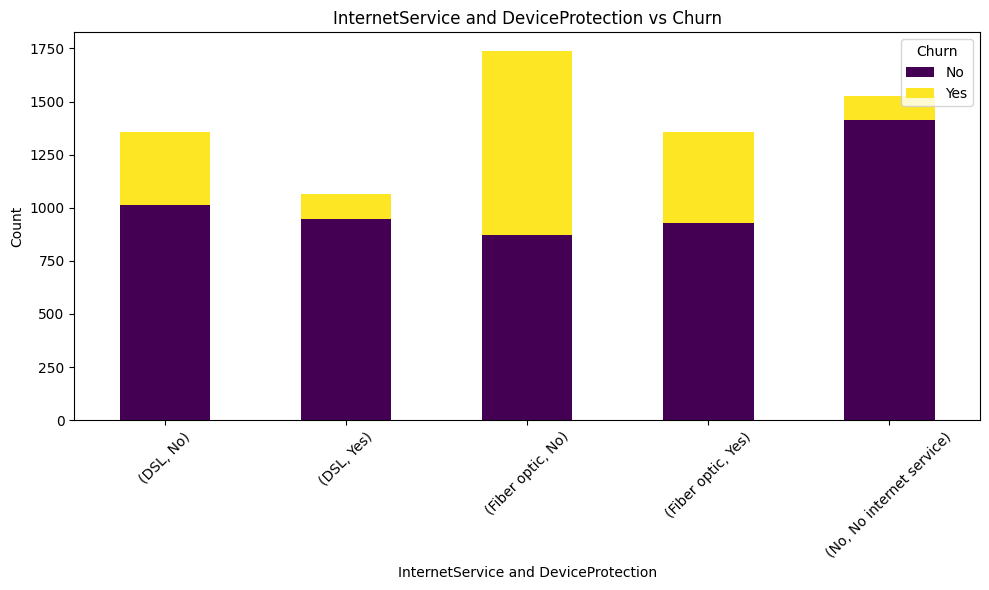

In [44]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'], new_data['DeviceProtection']], columns=new_data['Churn'])
table.index.names = ['InternetService', 'DeviceProtection']
table.columns.name = 'Churn'
print(table)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService and DeviceProtection vs Churn')
plt.xlabel('InternetService and DeviceProtection')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                  No   Yes
InternetService OnlineSecurity                 
DSL             No                    894   347
                Yes                  1068   112
Fiber optic     No                   1143  1114
                Yes                   656   183
No              No internet service  1413   113
Churn                                       No        Yes
InternetService OnlineSecurity                           
DSL             No                   72.038678  27.961322
                Yes                  90.508475   9.491525
Fiber optic     No                   50.642446  49.357554
                Yes                  78.188319  21.811681


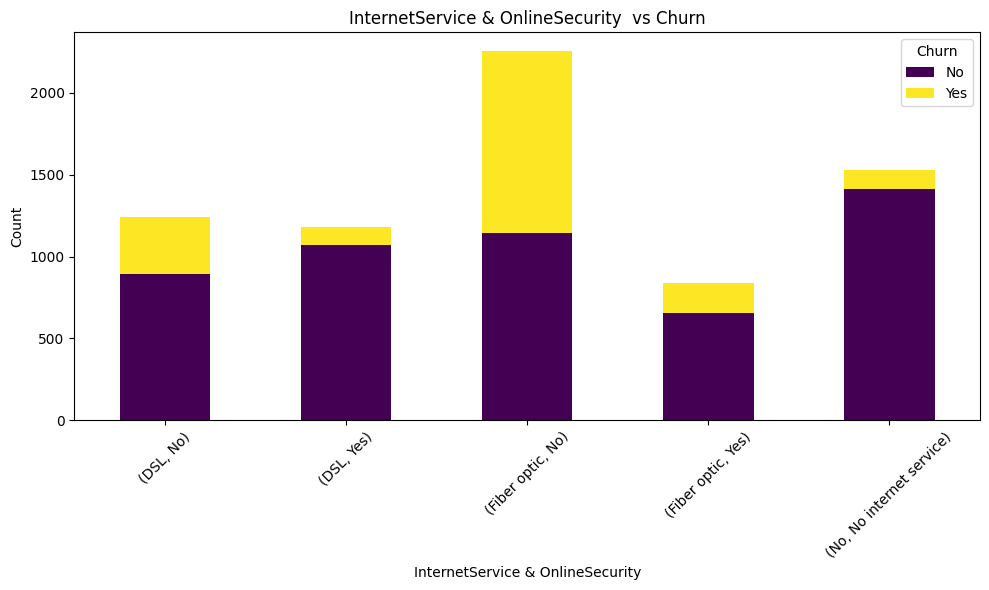

In [54]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'],new_data['OnlineSecurity']], columns=new_data['Churn'])
table.index.names = ['InternetService','OnlineSecurity']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService & OnlineSecurity  vs Churn')
plt.xlabel('InternetService & OnlineSecurity')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                  No  Yes
InternetService OnlineBackup                  
DSL             No                    992  343
                Yes                   970  116
Fiber optic     No                    863  890
                Yes                   936  407
No              No internet service  1413  113
Churn                                       No        Yes
InternetService OnlineBackup                             
DSL             No                   74.307116  25.692884
                Yes                  89.318600  10.681400
Fiber optic     No                   49.229892  50.770108
                Yes                  69.694713  30.305287
No     

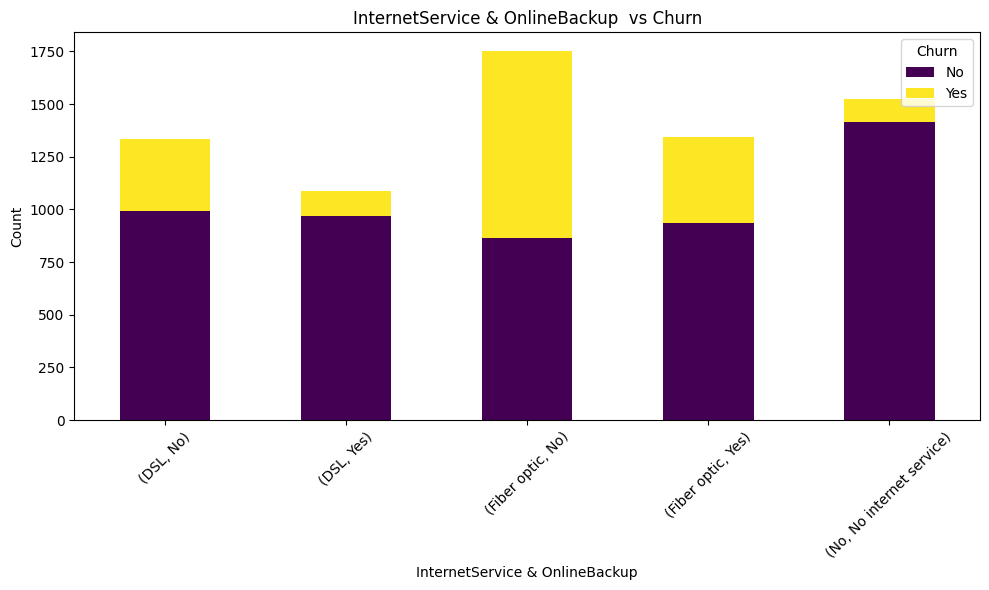

In [53]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'],new_data['OnlineBackup']], columns=new_data['Churn'])
table.index.names = ['InternetService','OnlineBackup']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService & OnlineBackup  vs Churn')
plt.xlabel('InternetService & OnlineBackup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                                      No  Yes
Contract       PaymentMethod                      
Month-to-month Bank transfer (automatic)  388  201
               Credit card (automatic)    365  178
               Electronic check           856  994
               Mailed check               611  282
One year       Bank transfer (automatic)  353   38
               Credit card (automatic)    357   41
               Electronic check           283   64
               Mailed check               314   23
Two year       Bank transfer (automatic)  545   19
               Credit card (automatic)    568   13
               Electronic check           155   13
               Mailed

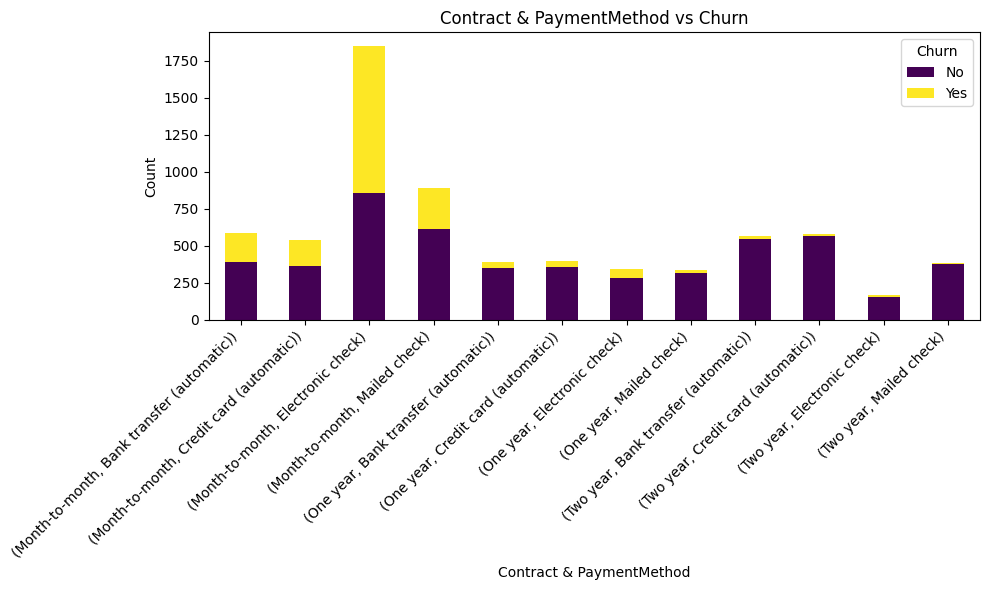

In [52]:
print(object_columns)
table = pd.crosstab(index=[new_data['Contract'], new_data['PaymentMethod']], columns=new_data['Churn'])
table.index.names = ['Contract', 'PaymentMethod']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
ax = table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Contract & PaymentMethod vs Churn')
plt.xlabel('Contract & PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                           No   Yes
Contract       SeniorCitizen            
Month-to-month 0              1854  1214
               1               366   441
One year       0              1146   137
               1               161    29
Two year       0              1508    42
               1               139     6
Churn                                No        Yes
Contract       SeniorCitizen                      
Month-to-month 0              60.430248  39.569752
               1              45.353160  54.646840
One year       0              89.321902  10.678098
               1              84.736842  15.263158
Two year       0              97.290323   2.709677

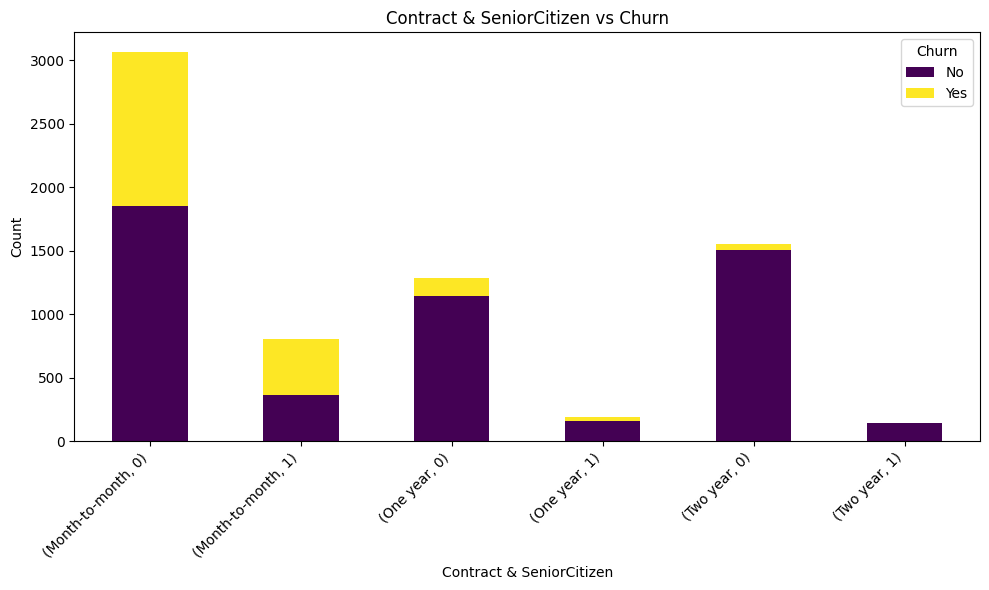

In [60]:
print(object_columns)
table = pd.crosstab(index=[new_data['Contract'],new_data['SeniorCitizen']], columns=new_data['Churn'])
table.index.names = ['Contract', 'SeniorCitizen']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
ax = table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Contract & SeniorCitizen vs Churn')
plt.xlabel('Contract & SeniorCitizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                          No  Yes
InternetService TechSupport           
DSL             0            1781  381
                1             181   78
Fiber optic     0            1361  904
                1             438  393
No              0            1366  108
                1              47    5
Churn                               No        Yes
InternetService TechSupport                      
DSL             0            82.377428  17.622572
                1            69.884170  30.115830
Fiber optic     0            60.088300  39.911700
                1            52.707581  47.292419
No              0            92.672999   7.327001
                1     

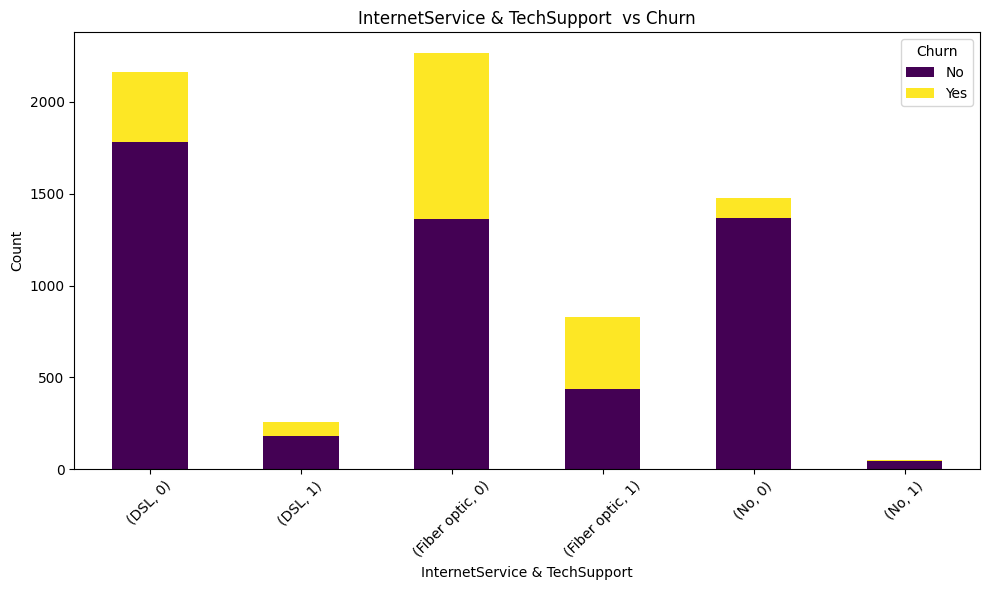

In [61]:
print(object_columns)
table = pd.crosstab(index=[new_data['InternetService'], new_data['SeniorCitizen']], columns=new_data['Churn'])
table.index.names = ['InternetService', 'TechSupport']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('InternetService & TechSupport  vs Churn')
plt.xlabel('InternetService & TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Churn                   No  Yes
gender SeniorCitizen           
Female 0              2221  699
       1               328  240
Male   0              2287  694
       1               338  236
Churn                        No        Yes
gender SeniorCitizen                      
Female 0              76.061644  23.938356
       1              57.746479  42.253521
Male   0              76.719222  23.280778
       1              58.885017  41.114983


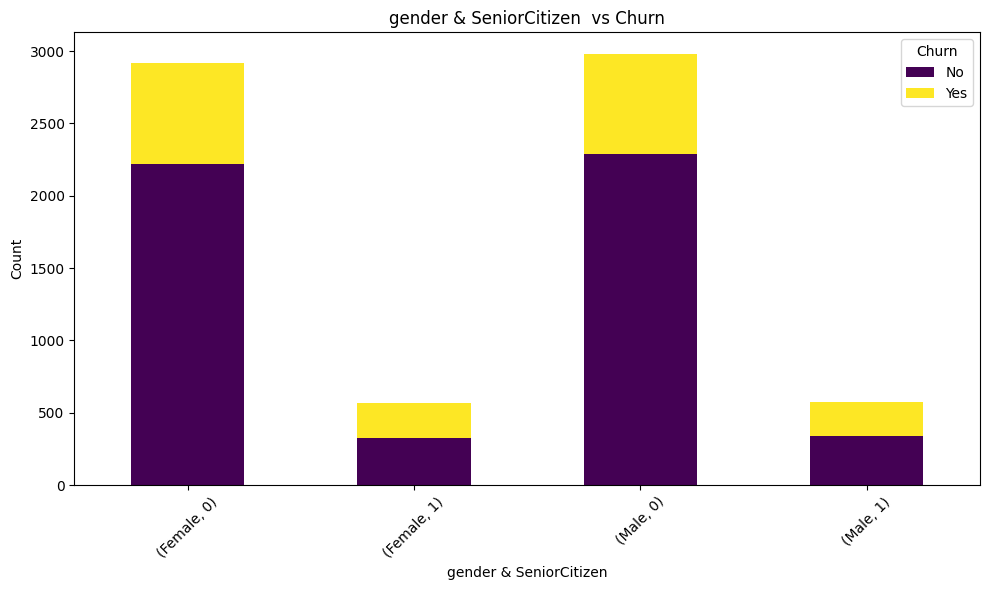

In [62]:
print(object_columns)
table = pd.crosstab(index=[new_data['gender'], new_data['SeniorCitizen']], columns=new_data['Churn'])
table.index.names = ['gender', 'SeniorCitizen']
table.columns.name = 'Churn'
print(table)

# Calculate the percentage
table_percentage = table.div(table.sum(1), axis=0) * 100
print(table_percentage)

# Plot the crosstab table
table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('gender & SeniorCitizen  vs Churn')
plt.xlabel('gender & SeniorCitizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()